In [1]:
from pathlib import Path
import pandas as pd

# Ruta base relativa al notebook
ruta_base = Path("../data/raw")  # ← Ajuste: aquí están realmente tus archivos según los notebooks exitosos

# Buscar archivos de compras del 2020 al 2025
archivos_compras = sorted(ruta_base.glob("compras_dcto_202*.xlsx"))
print(f"📁 Se encontraron {len(archivos_compras)} archivos de compras.")

# Cargar y consolidar en un solo DataFrame
df_compras = pd.concat(
    [pd.read_excel(f, engine="openpyxl").assign(anio=int(f.stem.split("_")[-1])) for f in archivos_compras],
    ignore_index=True
)

# Vista previa
print("✅ Compras cargadas:", df_compras.shape)
df_compras.head()


📁 Se encontraron 6 archivos de compras.
✅ Compras cargadas: (7052, 12)


,cod_cliente,cliente,documento,defecha,vr_gravado,vr_nogravado,subtotal,iva,total,tipodocumento,tipotercero,anio
0,PR 10305,CLUB DEL VINO LTDA,40 407,2020-01-01,32420,-1.0,32419.0,1621.0,34040.0,F,Nacional,2020
1,PR 10305,CLUB DEL VINO LTDA,2 409,2020-01-01,327500,-10.0,327490.0,16375.0,343865.0,F,Nacional,2020
2,PR 10305,CLUB DEL VINO LTDA,12 410,2020-01-01,229440,-1.0,229439.0,11472.0,240911.0,F,Nacional,2020
3,PR 10305,CLUB DEL VINO LTDA,4 408,2020-01-01,326180,14.0,326194.0,16309.0,342503.0,F,Nacional,2020
4,PR 10305,CLUB DEL VINO LTDA,40 603,2020-01-01,108460,3.0,108463.0,5423.0,113886.0,F,Nacional,2020


Paso 1: Cargando y consolidando archivos de compras...
✔️ Se encontraron 6 archivos de compras.
✔️ Compras cargadas: 7052 registros y 12 columnas.
Vista previa de los datos cargados:
  cod_cliente             cliente      documento    defecha  vr_gravado  \
0    PR 10305  CLUB DEL VINO LTDA   40       407 2020-01-01       32420   
1    PR 10305  CLUB DEL VINO LTDA    2       409 2020-01-01      327500   
2    PR 10305  CLUB DEL VINO LTDA   12       410 2020-01-01      229440   
3    PR 10305  CLUB DEL VINO LTDA    4       408 2020-01-01      326180   
4    PR 10305  CLUB DEL VINO LTDA   40       603 2020-01-01      108460   

   vr_nogravado  subtotal      iva     total tipodocumento tipotercero  anio  
0          -1.0   32419.0   1621.0   34040.0             F    Nacional  2020  
1         -10.0  327490.0  16375.0  343865.0             F    Nacional  2020  
2          -1.0  229439.0  11472.0  240911.0             F    Nacional  2020  
3          14.0  326194.0  16309.0  342503.0      

/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2522/927920553.py:79: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_compras['cliente'].str.contains(patron_filtrado, regex=True, case=False, na=False)


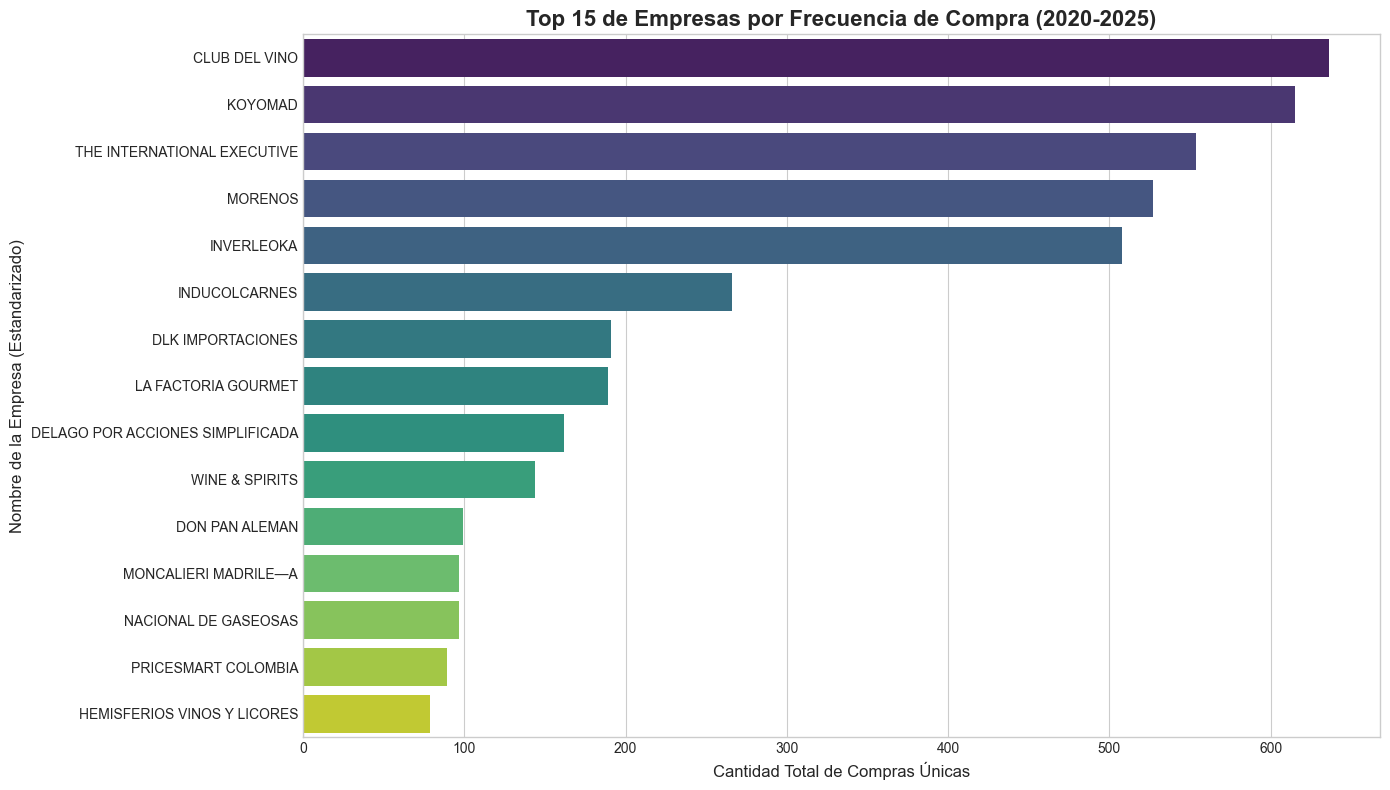


Proceso completado exitosamente.


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from pathlib import Path

# ==============================================================================
# 1. DEFINICIÓN DE CONSTANTES Y PARÁMETROS
# ==============================================================================
# Define el número de empresas a mostrar en el top
TOP_N = 15

# Lista de palabras clave para identificar a una empresa (persona jurídica).
# Se usarán para filtrar y asegurar que solo se procesan entidades corporativas.
CORPORATE_KEYWORDS = [
    'SAS', 'S.A.S', 'LTDA', 'LIMITADA', 'SA', 'S.A', 'CIA', 'COMPAÑIA', 
    'E.U', 'EMPRESAS', 'INDUSTRIA', 'SOCIEDAD', 'INVERSIONES', 'COMERCIALIZADORA',
    'GLOBAL', 'GROUP', 'GRUPO'
]

# ==============================================================================
# 2. FUNCIÓN DE ESTANDARIZACIÓN ROBUSTA
# ==============================================================================
def estandarizar_y_limpiar_nombre(nombre: str) -> str:
    """
    Limpia y estandariza un nombre de cliente para agruparlo correctamente.
    """
    if not isinstance(nombre, str):
        return ""

    # Convertir a mayúsculas y quitar espacios en los extremos
    nombre_limpio = nombre.upper().strip()

    # Usar expresiones regulares para unificar y luego eliminar los identificadores corporativos
    patron_eliminar = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
    nombre_limpio = re.sub(patron_eliminar, '', nombre_limpio, flags=re.IGNORECASE)
    
    # Eliminar puntos, comas y otros caracteres que no aportan al nombre
    nombre_limpio = re.sub(r'[.,;]', '', nombre_limpio)

    # Reemplazar múltiples espacios por uno solo y limpiar extremos de nuevo
    nombre_limpio = re.sub(r'\s+', ' ', nombre_limpio).strip()
    
    return nombre_limpio

# ==============================================================================
# 3. CARGA Y CONSOLIDACIÓN DE DATOS ORIGINALES
# ==============================================================================
print("Paso 1: Cargando y consolidando archivos de compras...")

# Ruta base relativa al notebook. 
# IMPORTANTE: Ajusta esta ruta según la ubicación real de tus archivos.
ruta_base = Path("../data/raw") 

# Buscar archivos de compras de 2020 al 2025
archivos_compras = sorted(ruta_base.glob("compras_dcto_202*.xlsx"))
print(f"✔️ Se encontraron {len(archivos_compras)} archivos de compras.")

# Cargar y consolidar en un solo DataFrame
# Asumimos que los archivos contienen las columnas 'cliente' y 'documento'
df_compras = pd.concat(
    [pd.read_excel(f, engine="openpyxl").assign(anio=int(f.stem.split("_")[-1])) for f in archivos_compras],
    ignore_index=True
)

print(f"✔️ Compras cargadas: {df_compras.shape[0]} registros y {df_compras.shape[1]} columnas.")
print("Vista previa de los datos cargados:")
print(df_compras.head())


# ==============================================================================
# 4. PROCESAMIENTO Y ANÁLISIS DE DATOS
# ==============================================================================

print("\nPaso 2: Filtrando para quedarnos solo con clientes empresariales...")
# Crea el patrón de búsqueda para filtrar. Es insensible a mayúsculas/minúsculas.
patron_filtrado = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
df_empresas = df_compras[
    df_compras['cliente'].str.contains(patron_filtrado, regex=True, case=False, na=False)
].copy()

print(f"✔️ Se encontraron {len(df_empresas)} registros de compras de empresas.")

print("\nPaso 3: Estandarizando los nombres de las empresas...")
# Aplica la función de estandarización robusta a la columna de clientes.
df_empresas['cliente_estandarizado'] = df_empresas['cliente'].apply(estandarizar_y_limpiar_nombre)

print("\nPaso 4: Calculando la frecuencia de compra por empresa estandarizada...")
# Agrupa por el nombre estandarizado y cuenta las compras únicas.
frecuencia_empresas = (
    df_empresas.groupby('cliente_estandarizado')
    .agg(frecuencia_compras=('documento', 'nunique'))
    .reset_index()
)
# Eliminar filas donde el nombre estandarizado quedó vacío (si las hubiera)
frecuencia_empresas = frecuencia_empresas[frecuencia_empresas['cliente_estandarizado'] != '']

print(f"\nPaso 5: Seleccionando el Top {TOP_N} de empresas...")
# Ordena por frecuencia de compra y selecciona el top N.
top_empresas = frecuencia_empresas.sort_values(
    by='frecuencia_compras', ascending=False
).head(TOP_N)

print("\nTop Empresas encontradas después de la limpieza y agrupación:")
print(top_empresas)

# ==============================================================================
# 5. VISUALIZACIÓN DE RESULTADOS
# ==============================================================================
print("\nPaso 6: Generando la visualización final...")

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

# Crear el gráfico de barras horizontal
ax = sns.barplot(
    data=top_empresas,
    x='frecuencia_compras',
    y='cliente_estandarizado',
    palette='viridis',
    hue='cliente_estandarizado',
    dodge=False 
)
plt.legend([],[], frameon=False) 

# Añadir títulos y etiquetas claras
plt.title(f'Top {TOP_N} de Empresas por Frecuencia de Compra (2020-2025)', fontsize=16, weight='bold')
plt.xlabel('Cantidad Total de Compras Únicas', fontsize=12)
plt.ylabel('Nombre de la Empresa (Estandarizado)', fontsize=12)

# Mejorar la legibilidad de las etiquetas
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Ajustar el diseño para que todo sea visible
plt.tight_layout()

# Mostrar el gráfico
plt.show()

print("\nProceso completado exitosamente.")



In [16]:
#Codigo que representa las estadisticas descriptivas asociadas al comportamiento de compras
import pandas as pd

# Asumiendo que ya tienes cargado `df_compras` consolidado (2020–2025)

# 1. Revisar columnas relevantes para análisis monetario
columnas_valores = ['vr_gravado', 'vr_nogravado', 'subtotal', 'iva', 'total']

# 2. Estadísticas básicas con .describe()
estadisticas_basicas = df_compras[columnas_valores].describe()
print("📊 Estadísticas Básicas:")
print(estadisticas_basicas)

# 3. Calcular valores adicionales
media = df_compras[columnas_valores].mean()
mediana = df_compras[columnas_valores].median()
desviacion_std = df_compras[columnas_valores].std()
percentiles = df_compras[columnas_valores].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

print("\n📈 Media:")
print(media)

print("\n🔸 Mediana:")
print(mediana)

print("\n📉 Desviación Estándar:")
print(desviacion_std)

print("\n📌 Percentiles (25%, 50%, 75%, 90%, 95%, 99%):")
print(percentiles)

# 4. Si deseas agrupar por cliente para BI por cliente:
estadisticas_por_cliente = df_compras.groupby('cliente')['total'].agg(['count', 'sum', 'mean', 'median', 'std', 'min', 'max'])
estadisticas_por_cliente = estadisticas_por_cliente.sort_values(by='sum', ascending=False)

print("\n🧠 Estadísticas agregadas por cliente (ordenadas por mayor total de compra):")
print(estadisticas_por_cliente.head(10))  # muestra top 10 clientes por monto total comprado


📊 Estadísticas Básicas:
         vr_gravado  vr_nogravado      subtotal           iva         total
count  7.052000e+03  7.052000e+03  7.052000e+03  7.052000e+03  7.052000e+03
mean   5.069660e+06  6.055232e+05  5.675183e+06  8.239188e+04  5.757575e+06
std    2.770339e+07  6.177939e+06  3.035305e+07  1.496685e+05  3.034454e+07
min   -2.788079e+06 -9.374900e+05 -2.958021e+06 -1.946660e+05 -3.102490e+06
25%    5.772000e+04  0.000000e+00  1.713060e+05  1.262000e+03  1.867912e+05
50%    3.063900e+05  0.000000e+00  4.887775e+05  2.460400e+04  5.448831e+05
75%    1.018974e+06  5.796000e+04  1.209201e+06  1.011085e+05  1.329422e+06
max    4.471317e+08  1.968013e+08  5.233679e+08  3.310095e+06  5.233679e+08

📈 Media:
vr_gravado      5.069660e+06
vr_nogravado    6.055232e+05
subtotal        5.675183e+06
iva             8.239188e+04
total           5.757575e+06
dtype: float64

🔸 Mediana:
vr_gravado      306390.00
vr_nogravado         0.00
subtotal        488777.50
iva              24604.00
total 

In [8]:
#Codigo que representa el comportamiento de las estadisticas desc


count    119.000000
mean      59.260504
std      131.415660
min        1.000000
25%        3.000000
50%       11.000000
75%       35.500000
max      636.000000
Name: frecuencia_compras_2020_2025, dtype: float64

In [17]:
# Asegúrate de tener pandas importado y df_compras cargado
import pandas as pd

# Agrupar por código y nombre del cliente
resumen_frecuencia = df_compras.groupby(['cod_cliente', 'cliente']) \
    .agg(frecuencia_compras_2020_2025=('documento', 'nunique')) \
    .reset_index() \
    .rename(columns={
        'cliente': 'nombre_cliente_display'
    })

# Vista previa
print(resumen_frecuencia.head())

# Exportar a Excel si deseas
resumen_frecuencia.to_excel('resumen_frecuencia_compras_2020_2025.xlsx', index=False)



        cod_cliente                             nombre_cliente_display  \
0  PR  100000000001               DISTRIBUIDORA DE VINOS Y LICORES SAS   
1  PR  100000000016                              MADRIGAL  JUAN CARLOS   
2  PR  100000000055  INDUSTRIA DE PRODUCTOS ALIMENTICIOS LACTE NOVO...   
3  PR  100000000058                                             BEL SA   
4  PR  100000000069                       BEDOYA JIMENEZ MARIA CENELIA   

   frecuencia_compras_2020_2025  
0                            23  
1                             2  
2                             1  
3                            18  
4                             3  


Paso 1: Cargando y consolidando archivos de compras...
✔️ Se encontraron 6 archivos de compras.
✔️ Compras cargadas: 7052 registros y 12 columnas.

Paso 2: Filtrando para quedarnos solo con clientes empresariales...
✔️ Se encontraron 5279 registros de compras de empresas.

Paso 3: Estandarizando los nombres de las empresas...

Paso 4: Calculando la frecuencia de compra total por empresa...

Paso 5: Calculando la frecuencia de compra promedio anual...
✔️ El período de análisis abarca 6 años únicos.

Paso 6: Seleccionando el Top N de empresas...

--- Resultados del Análisis Corporativo ---
               cliente_estandarizado  frecuencia_compras_total  \
12                     CLUB DEL VINO                       636   
39                           KOYOMAD                       615   
72       THE INTERNATIONAL EXECUTIVE                       554   
53                           MORENOS                       527   
36                        INVERLEOKA                       508   
34       

/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2522/1359572462.py:74: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_compras['cliente'].str.contains(patron_filtrado, regex=True, case=False, na=False)


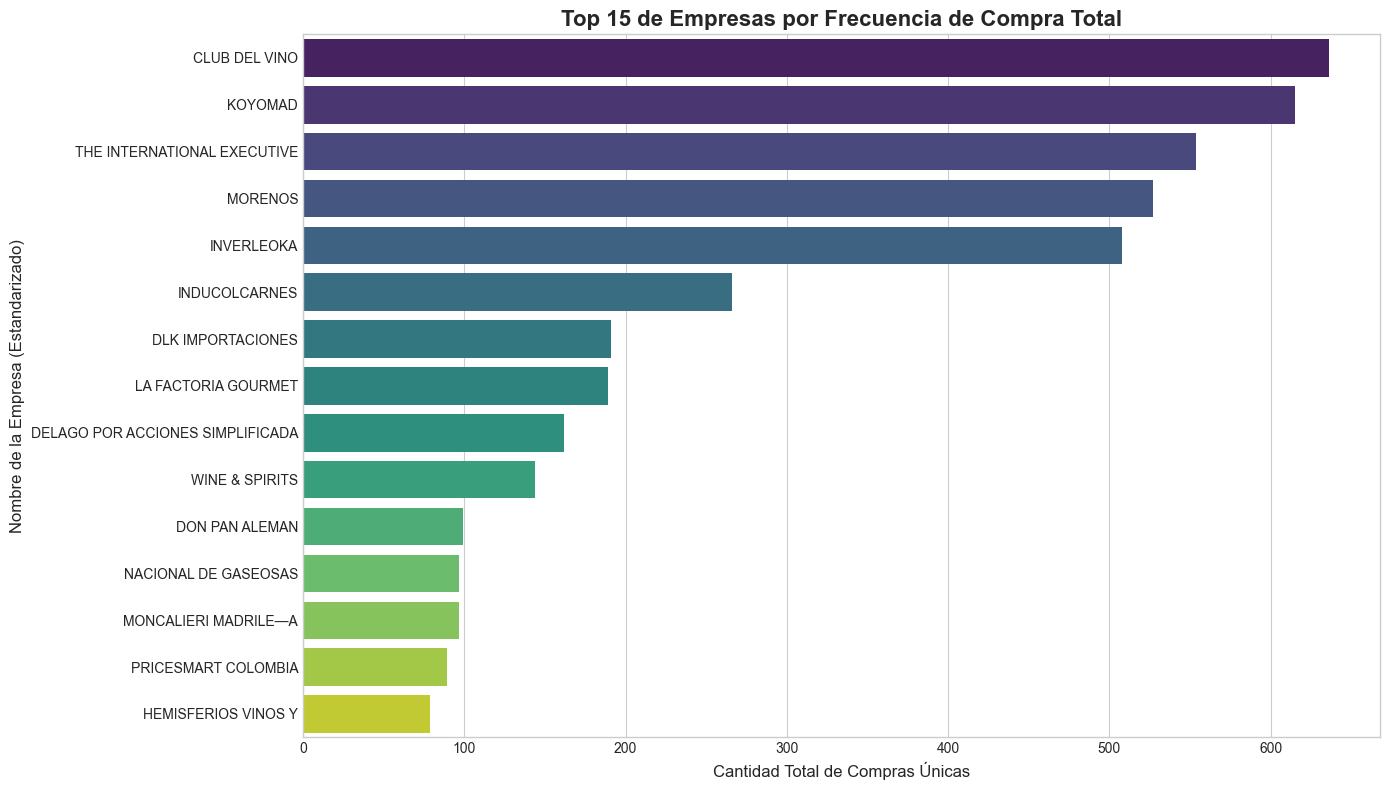


Proceso completado exitosamente.


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from pathlib import Path

# ==============================================================================
# 1. DEFINICIÓN DE CONSTANTES Y PARÁMETROS
# ==============================================================================
# Define el número de empresas a mostrar en el top
TOP_N = 15

# Lista de palabras clave para identificar a una empresa (persona jurídica).
# Se usarán para filtrar y asegurar que solo se procesan entidades corporativas.
CORPORATE_KEYWORDS = [
    'SAS', 'S.A.S', 'LTDA', 'LIMITADA', 'SA', 'S.A', 'CIA', 'COMPAÑIA', 
    'E.U', 'EMPRESAS', 'INDUSTRIA', 'SOCIEDAD', 'INVERSIONES', 'COMERCIALIZADORA',
    'GLOBAL', 'GROUP', 'GRUPO', 'DISTRIBUIDORA', 'LICORES' # Añadidas para mayor cobertura
]

# ==============================================================================
# 2. FUNCIÓN DE ESTANDARIZACIÓN ROBUSTA
# ==============================================================================
def estandarizar_y_limpiar_nombre(nombre: str) -> str:
    """
    Limpia y estandariza un nombre de cliente para agruparlo correctamente.
    """
    if not isinstance(nombre, str):
        return ""

    # Convertir a mayúsculas y quitar espacios en los extremos
    nombre_limpio = nombre.upper().strip()

    # Usar expresiones regulares para unificar y luego eliminar los identificadores corporativos
    patron_eliminar = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
    nombre_limpio = re.sub(patron_eliminar, '', nombre_limpio, flags=re.IGNORECASE)
    
    # Eliminar puntos, comas y otros caracteres que no aportan al nombre
    nombre_limpio = re.sub(r'[.,;]', '', nombre_limpio)

    # Reemplazar múltiples espacios por uno solo y limpiar extremos de nuevo
    nombre_limpio = re.sub(r'\s+', ' ', nombre_limpio).strip()
    
    return nombre_limpio

# ==============================================================================
# 3. CARGA Y CONSOLIDACIÓN DE DATOS ORIGINALES
# ==============================================================================
print("Paso 1: Cargando y consolidando archivos de compras...")

# Ruta base relativa al notebook. 
# IMPORTANTE: Ajusta esta ruta según la ubicación real de tus archivos.
ruta_base = Path("../data/raw") 

# Buscar archivos de compras
archivos_compras = sorted(ruta_base.glob("compras_dcto_202*.xlsx"))
print(f"✔️ Se encontraron {len(archivos_compras)} archivos de compras.")

# Cargar y consolidar en un solo DataFrame
df_compras = pd.concat(
    [pd.read_excel(f, engine="openpyxl").assign(anio=int(f.stem.split("_")[-1])) for f in archivos_compras],
    ignore_index=True
)

print(f"✔️ Compras cargadas: {df_compras.shape[0]} registros y {df_compras.shape[1]} columnas.")

# ==============================================================================
# 4. PROCESAMIENTO Y ANÁLISIS DE CLIENTES CORPORATIVOS
# ==============================================================================

print("\nPaso 2: Filtrando para quedarnos solo con clientes empresariales...")
patron_filtrado = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
df_empresas = df_compras[
    df_compras['cliente'].str.contains(patron_filtrado, regex=True, case=False, na=False)
].copy()

print(f"✔️ Se encontraron {len(df_empresas)} registros de compras de empresas.")

print("\nPaso 3: Estandarizando los nombres de las empresas...")
df_empresas['cliente_estandarizado'] = df_empresas['cliente'].apply(estandarizar_y_limpiar_nombre)

print("\nPaso 4: Calculando la frecuencia de compra total por empresa...")
frecuencia_empresas = (
    df_empresas.groupby('cliente_estandarizado')
    .agg(frecuencia_compras_total=('documento', 'nunique'))
    .reset_index()
)
frecuencia_empresas = frecuencia_empresas[frecuencia_empresas['cliente_estandarizado'] != '']

print("\nPaso 5: Calculando la frecuencia de compra promedio anual...")
numero_de_anios = df_empresas['anio'].nunique()

if numero_de_anios > 0:
    print(f"✔️ El período de análisis abarca {numero_de_anios} años únicos.")
    frecuencia_empresas['frecuencia_compras_promedio_anual'] = (
        frecuencia_empresas['frecuencia_compras_total'] / numero_de_anios
    ).round(2)
else:
    print("⚠️ No se encontraron datos de años para calcular el promedio anual.")
    frecuencia_empresas['frecuencia_compras_promedio_anual'] = 0

print("\nPaso 6: Seleccionando el Top N de empresas...")
top_empresas = frecuencia_empresas.sort_values(
    by='frecuencia_compras_total', ascending=False
).head(TOP_N)

print("\n--- Resultados del Análisis Corporativo ---")
print(top_empresas)

# ==============================================================================
# 5. VISUALIZACIÓN DE RESULTADOS
# ==============================================================================
print("\nPaso 7: Generando la visualización final...")

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

ax = sns.barplot(
    data=top_empresas,
    x='frecuencia_compras_total',
    y='cliente_estandarizado',
    palette='viridis',
    hue='cliente_estandarizado',
    dodge=False 
)
plt.legend([],[], frameon=False) 

plt.title(f'Top {TOP_N} de Empresas por Frecuencia de Compra Total', fontsize=16, weight='bold')
plt.xlabel('Cantidad Total de Compras Únicas', fontsize=12)
plt.ylabel('Nombre de la Empresa (Estandarizado)', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

print("\nProceso completado exitosamente.")

--- 1. Cargando Datos Reales desde Archivos Excel ---
✔️ Se encontraron 6 archivos de compras.
✔️ Compras cargadas: 7052 registros.

--- 2. Filtrando y Preparando Datos Corporativos ---
✔️ Se encontraron 5279 registros de compras de clientes corporativos.
✔️ Variable 'frecuencia de corporativos' lista para el análisis.

--- 3. Análisis Estadístico Descriptivo (Solo Corporativos) ---
Estadísticas Fundamentales:
count     78.000000
mean      67.679487
std      141.284506
min        1.000000
25%        4.000000
50%       14.500000
75%       48.000000
max      636.000000
Name: frecuencia_compras_total, dtype: float64

Otras Medidas de Forma:
Asimetría (Skewness): 3.06
Curtosis (Kurtosis): 8.68

--- 4. Visualización de la Distribución (Solo Corporativos) ---


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2522/135289466.py:46: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_compras['cliente'].str.contains(patron_filtrado, regex=True, case=False, na=False)


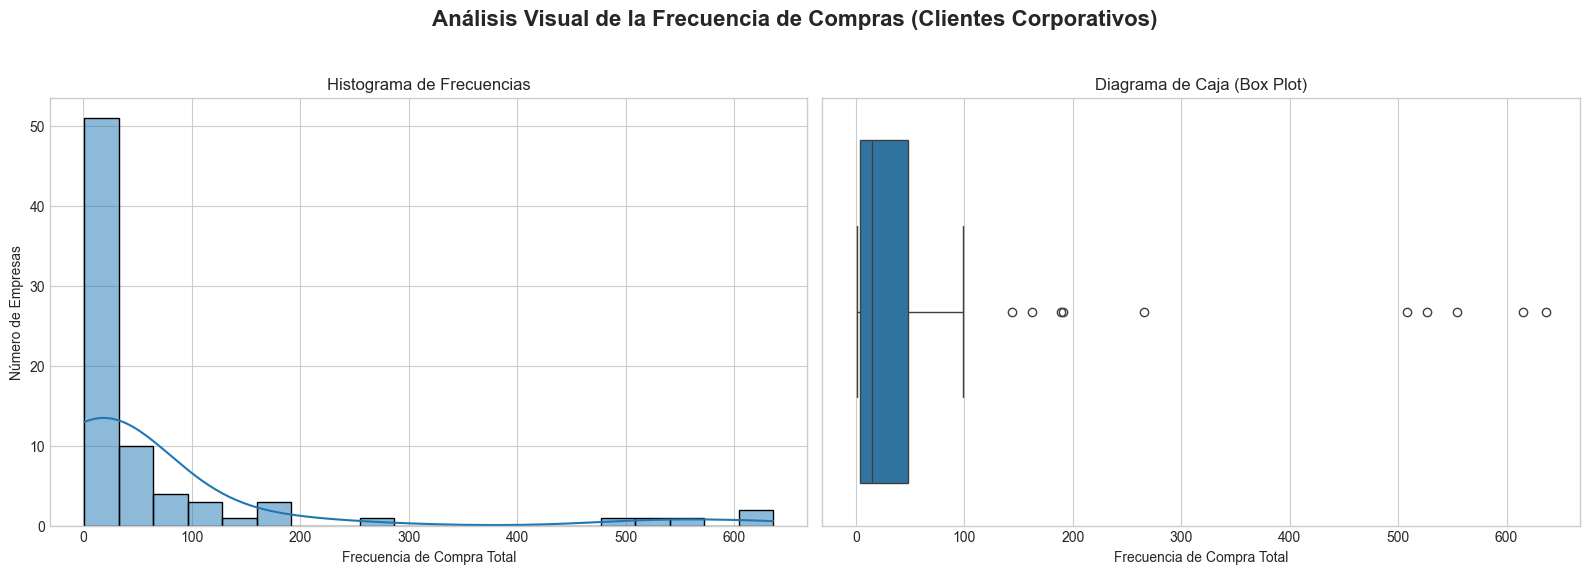


--- 5. Prueba de Normalidad (Shapiro-Wilk) ---
Estadístico de la prueba: 0.4992
P-valor: 7.13e-15

Conclusión: Se rechaza la Hipótesis Nula (p <= 0.05). La muestra NO sigue una distribución normal.

✔️ Reporte con la frecuencia de clientes corporativos guardado en 'reporte_frecuencia_clientes_corporativos.xlsx'

--- Proceso completado exitosamente ---


In [ ]:
#Estadisticas descriptivas asociadas al numero total de transacciones (compras unicas) realizadas exclusivamente por los clientes corporativos en el periodo 2020-2025
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path

# --- PASO 1: DEFINICIÓN DE PARÁMETROS Y FUNCIÓN DE ESTANDARIZACIÓN ---

CORPORATE_KEYWORDS = [
    'SAS', 'S.A.S', 'LTDA', 'LIMITADA', 'SA', 'S.A', 'CIA', 'COMPAÑIA', 
    'E.U', 'EMPRESAS', 'INDUSTRIA', 'SOCIEDAD', 'INVERSIONES', 'COMERCIALIZADORA',
    'GLOBAL', 'GROUP', 'GRUPO', 'DISTRIBUIDORA', 'LICORES'
]

def estandarizar_y_limpiar_nombre(nombre: str) -> str:
    if not isinstance(nombre, str): return ""
    nombre_limpio = nombre.upper().strip()
    patron_eliminar = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
    nombre_limpio = re.sub(patron_eliminar, '', nombre_limpio, flags=re.IGNORECASE)
    nombre_limpio = re.sub(r'[.,;]', '', nombre_limpio)
    nombre_limpio = re.sub(r'\s+', ' ', nombre_limpio).strip()
    return nombre_limpio

# --- PASO 2: CARGA Y CONSOLIDACIÓN DE DATOS REALES ---
print("--- 1. Cargando Datos Reales desde Archivos Excel ---")
try:
    ruta_base = Path("../data/raw") 
    archivos_compras = sorted(ruta_base.glob("compras_dcto_202*.xlsx"))
    if not archivos_compras:
        raise FileNotFoundError("No se encontraron archivos Excel en la ruta especificada.")
    print(f"✔️ Se encontraron {len(archivos_compras)} archivos de compras.")
    df_compras = pd.concat(
        [pd.read_excel(f, engine="openpyxl").assign(anio=int(f.stem.split("_")[-1])) for f in archivos_compras],
        ignore_index=True
    )
    print(f"✔️ Compras cargadas: {df_compras.shape[0]} registros.")
except FileNotFoundError as e:
    print(f"ERROR: {e}")
    exit()

# --- PASO 3: FILTRADO Y PREPARACIÓN DE DATOS CORPORATIVOS ---
print("\n--- 2. Filtrando y Preparando Datos Corporativos ---")

patron_filtrado = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
df_empresas = df_compras[
    df_compras['cliente'].str.contains(patron_filtrado, regex=True, case=False, na=False)
].copy()
print(f"✔️ Se encontraron {len(df_empresas)} registros de compras de clientes corporativos.")

df_empresas['cliente_estandarizado'] = df_empresas['cliente'].apply(estandarizar_y_limpiar_nombre)

frecuencia_empresas = (
    df_empresas.groupby('cliente_estandarizado')
    .agg(frecuencia_compras_total=('documento', 'nunique'))
    .reset_index()
)
frecuencia_empresas = frecuencia_empresas[frecuencia_empresas['cliente_estandarizado'] != '']

# Aislamos la variable de frecuencia de los clientes corporativos
frecuencia_corporativos = frecuencia_empresas['frecuencia_compras_total']
print("✔️ Variable 'frecuencia de corporativos' lista para el análisis.")

# --- PASO 4: ESTADÍSTICAS DESCRIPTIVAS (SOLO CORPORATIVOS) ---
print("\n--- 3. Análisis Estadístico Descriptivo (Solo Corporativos) ---")
descripcion_corp = frecuencia_corporativos.describe()
print("Estadísticas Fundamentales:")
print(descripcion_corp)
print("\nOtras Medidas de Forma:")
print(f"Asimetría (Skewness): {frecuencia_corporativos.skew():.2f}")
print(f"Curtosis (Kurtosis): {frecuencia_corporativos.kurt():.2f}")

# --- PASO 5: VISUALIZACIÓN DE LA DISTRIBUCIÓN (SOLO CORPORATIVOS) ---
print("\n--- 4. Visualización de la Distribución (Solo Corporativos) ---")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Análisis Visual de la Frecuencia de Compras (Clientes Corporativos)', fontsize=16, weight='bold')

sns.histplot(frecuencia_corporativos, kde=True, ax=axes[0], bins=20)
axes[0].set_title('Histograma de Frecuencias')
axes[0].set_xlabel('Frecuencia de Compra Total')
axes[0].set_ylabel('Número de Empresas')

sns.boxplot(x=frecuencia_corporativos, ax=axes[1])
axes[1].set_title('Diagrama de Caja (Box Plot)')
axes[1].set_xlabel('Frecuencia de Compra Total')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- PASO 6: PRUEBA DE NORMALIDAD (SOLO CORPORATIVOS) ---
print("\n--- 5. Prueba de Normalidad (Shapiro-Wilk) ---")
shapiro_test_statistic, shapiro_p_value = stats.shapiro(frecuencia_corporativos)
print(f"Estadístico de la prueba: {shapiro_test_statistic:.4f}")
print(f"P-valor: {shapiro_p_value:.4g}")

alpha = 0.05
if shapiro_p_value > alpha:
    print("\nConclusión: No se puede rechazar la Hipótesis Nula (p > 0.05). La muestra podría ser normal.")
else:
    print("\nConclusión: Se rechaza la Hipótesis Nula (p <= 0.05). La muestra NO sigue una distribución normal.")

# --- PASO 7: EXPORTACIÓN DE RESULTADOS (OPCIONAL) ---
nombre_archivo_salida = "reporte_frecuencia_clientes_corporativos.xlsx"
frecuencia_empresas.to_excel(nombre_archivo_salida, index=False)
print(f"\n✔️ Reporte con la frecuencia de clientes corporativos guardado en '{nombre_archivo_salida}'")

print("\n--- Proceso completado exitosamente ---")

In [ ]:
# Calcular frecuencia total por cliente corporativo
#Calculo de la frecuencia de compras promedio anual en el periodo 2020-2025
resumen_frecuencia = df_compras.groupby(['cod_cliente', 'cliente']) \
    .agg(frecuencia_compras_2020_2025=('documento', 'nunique')) \
    .reset_index() \
    .rename(columns={'cliente': 'nombre_cliente_display'})

# Añadir la columna de frecuencia promedio anual (dividir entre 6 años)
resumen_frecuencia['frecuencia_compras_promedio_anual_2020_2025'] = \
    resumen_frecuencia['frecuencia_compras_2020_2025'] / 6

# Vista previa
print(resumen_frecuencia.head())

# (Opcional) Exportar a Excel
resumen_frecuencia.to_excel('resumen_frecuencia_con_promedio_anual.xlsx', index=False)



        cod_cliente                             nombre_cliente_display  \
0  PR  100000000001               DISTRIBUIDORA DE VINOS Y LICORES SAS   
1  PR  100000000016                              MADRIGAL  JUAN CARLOS   
2  PR  100000000055  INDUSTRIA DE PRODUCTOS ALIMENTICIOS LACTE NOVO...   
3  PR  100000000058                                             BEL SA   
4  PR  100000000069                       BEDOYA JIMENEZ MARIA CENELIA   

   frecuencia_compras_2020_2025  frecuencia_compras_promedio_anual_2020_2025  
0                            23                                     3.833333  
1                             2                                     0.333333  
2                             1                                     0.166667  
3                            18                                     3.000000  
4                             3                                     0.500000  


In [20]:
# Paso 5: Calculando la frecuencia de compra promedio anual...
numero_de_anios = df_empresas['anio'].nunique()

if numero_de_anios > 0:
    frecuencia_empresas['frecuencia_compras_promedio_anual'] = (
        frecuencia_empresas['frecuencia_compras_total'] / numero_de_anios
    ).round(2)

In [21]:
# --- PASO 6: SELECCIONAR EL TOP DE EMPRESAS ---
print("\nSeleccionando el Top de empresas para el reporte...")

# Ordenamos por la frecuencia total para encontrar las empresas más recurrentes
top_empresas = frecuencia_empresas.sort_values(
    by='frecuencia_compras_total', ascending=False
).head(TOP_N) # TOP_N es la constante que definimos al inicio (ej: 15)

print("\n--- Resultados del Análisis Corporativo (Top N) ---")
print(top_empresas)


Seleccionando el Top de empresas para el reporte...

--- Resultados del Análisis Corporativo (Top N) ---
               cliente_estandarizado  frecuencia_compras_total  \
12                     CLUB DEL VINO                       636   
39                           KOYOMAD                       615   
72       THE INTERNATIONAL EXECUTIVE                       554   
53                           MORENOS                       527   
36                        INVERLEOKA                       508   
34                     INDUCOLCARNES                       266   
21                 DLK IMPORTACIONES                       191   
42               LA FACTORIA GOURMET                       189   
15  DELAGO POR ACCIONES SIMPLIFICADA                       162   
74                    WINE & SPIRITS                       144   
22                    DON PAN ALEMAN                        99   
54              NACIONAL DE GASEOSAS                        97   
52              MONCALIERI MADRILE—A


Generando la visualización de la frecuencia promedio anual...


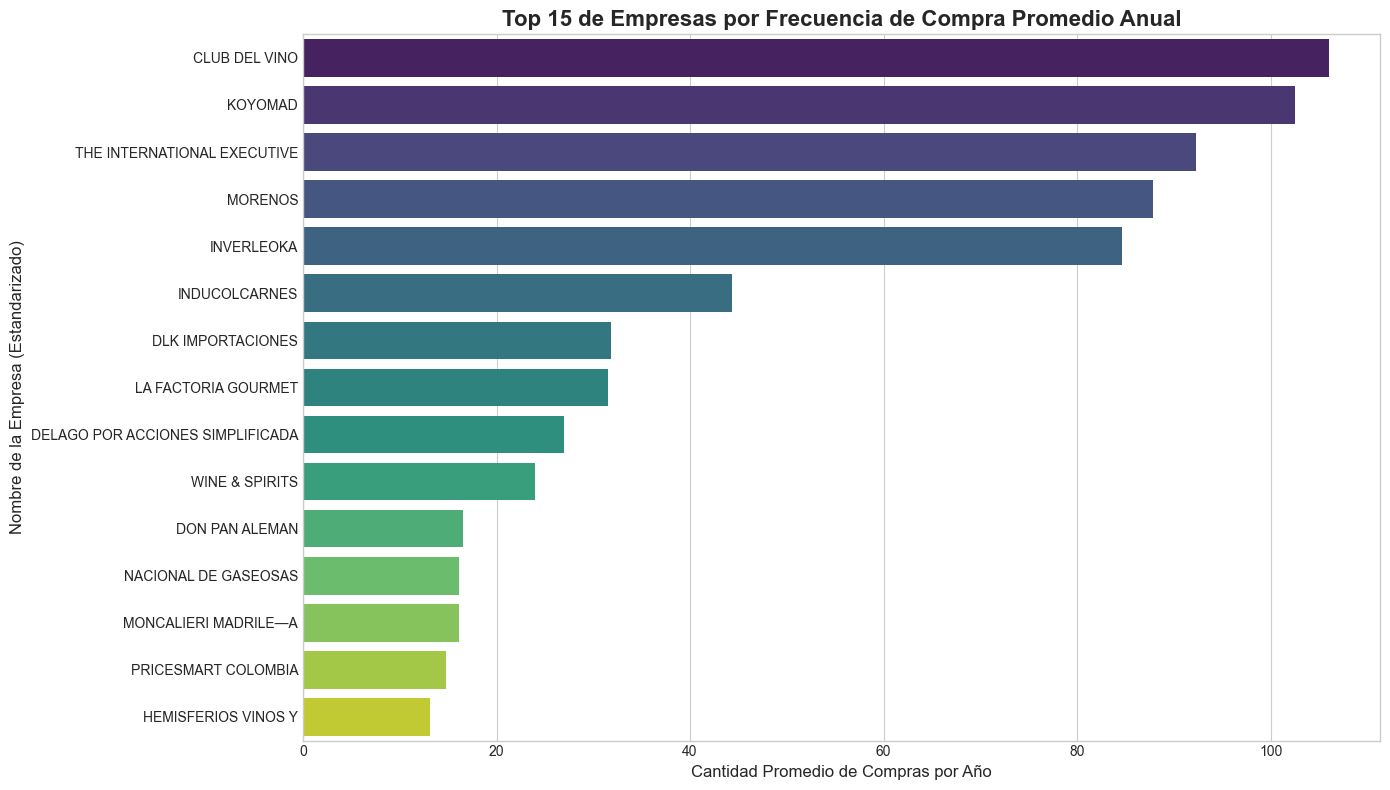

In [22]:
# --- PASO 7: VISUALIZACIÓN DE RESULTADOS ---
print("\nGenerando la visualización de la frecuencia promedio anual...")

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

# Graficamos la frecuencia promedio anual
ax = sns.barplot(
    data=top_empresas,
    x='frecuencia_compras_promedio_anual', # Usamos la columna del promedio anual
    y='cliente_estandarizado',
    palette='viridis',
    hue='cliente_estandarizado',
    dodge=False 
)
plt.legend([],[], frameon=False) 

# Actualizamos los títulos y etiquetas para que coincidan con el gráfico
plt.title(f'Top {TOP_N} de Empresas por Frecuencia de Compra Promedio Anual', fontsize=16, weight='bold')
plt.xlabel('Cantidad Promedio de Compras por Año', fontsize=12)
plt.ylabel('Nombre de la Empresa (Estandarizado)', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show() # Esta línea muestra el gráfico

--- 1. Cargando Datos Reales desde Archivos Excel ---
✔️ Se encontraron 6 archivos de compras.
✔️ Compras cargadas: 7052 registros.

--- 2. Preparando Datos Corporativos y Calculando Métricas ---
✔️ Variable 'frecuencia promedio anual' lista para el análisis.

--- 3. Análisis Estadístico Descriptivo (Frecuencia Promedio Anual) ---
Estadísticas Fundamentales:
count     78.000000
mean      11.280128
std       23.547090
min        0.170000
25%        0.670000
50%        2.415000
75%        8.002500
max      106.000000
Name: frecuencia_compras_promedio_anual, dtype: float64

Otras Medidas de Forma:
Asimetría (Skewness): 3.06
Curtosis (Kurtosis): 8.68

--- 4. Visualización de la Distribución (Frecuencia Promedio Anual) ---


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2522/1119278186.py:46: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_empresas = df_compras[df_compras['cliente'].str.contains(patron_filtrado, regex=True, case=False, na=False)].copy()


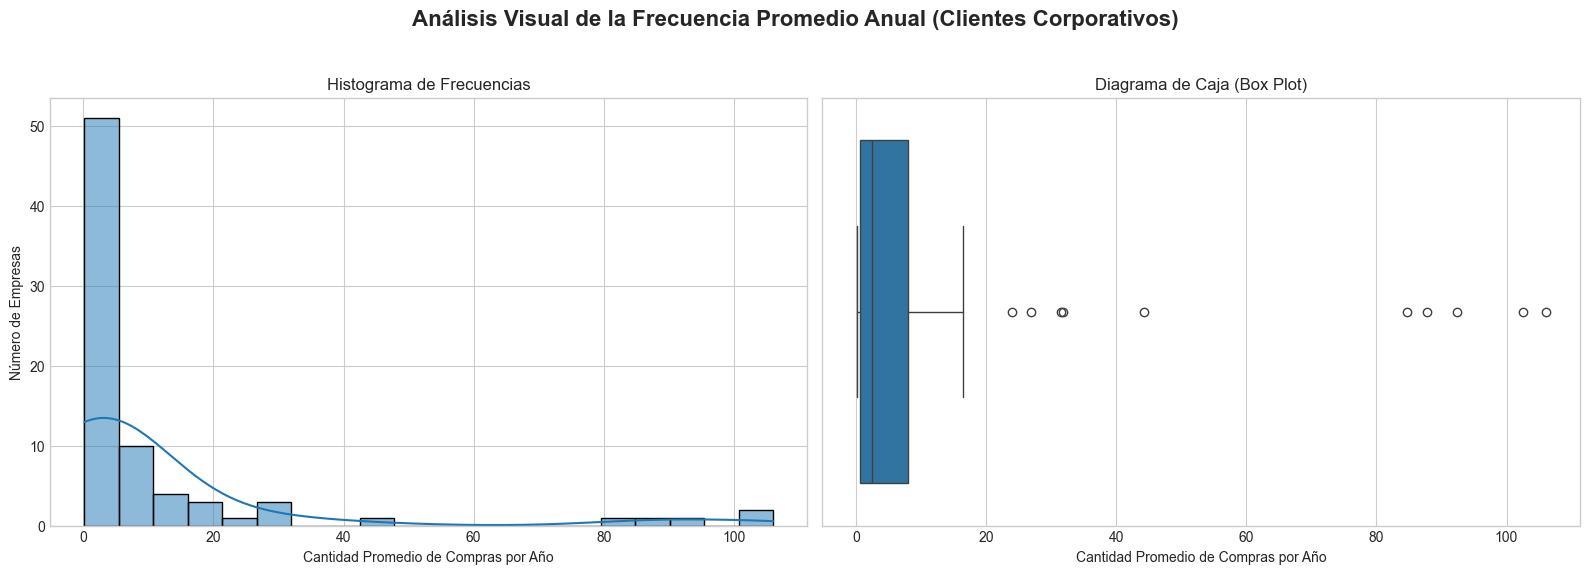


--- 5. Prueba de Normalidad (Shapiro-Wilk) ---
Estadístico de la prueba: 0.4992
P-valor: 7.128e-15

Conclusión: Se rechaza la Hipótesis Nula (p <= 0.05). La muestra NO sigue una distribución normal.

--- Proceso completado exitosamente ---


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path
import re # Importamos re para la función de estandarización

# --- PASO 1: DEFINICIÓN DE PARÁMETROS Y FUNCIÓN DE ESTANDARIZACIÓN ---

CORPORATE_KEYWORDS = [
    'SAS', 'S.A.S', 'LTDA', 'LIMITADA', 'SA', 'S.A', 'CIA', 'COMPAÑIA', 
    'E.U', 'EMPRESAS', 'INDUSTRIA', 'SOCIEDAD', 'INVERSIONES', 'COMERCIALIZADORA',
    'GLOBAL', 'GROUP', 'GRUPO', 'DISTRIBUIDORA', 'LICORES'
]

def estandarizar_y_limpiar_nombre(nombre: str) -> str:
    if not isinstance(nombre, str): return ""
    nombre_limpio = nombre.upper().strip()
    patron_eliminar = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
    nombre_limpio = re.sub(patron_eliminar, '', nombre_limpio, flags=re.IGNORECASE)
    nombre_limpio = re.sub(r'[.,;]', '', nombre_limpio)
    nombre_limpio = re.sub(r'\s+', ' ', nombre_limpio).strip()
    return nombre_limpio

# --- PASO 2: CARGA Y CONSOLIDACIÓN DE DATOS REALES ---
print("--- 1. Cargando Datos Reales desde Archivos Excel ---")
try:
    ruta_base = Path("../data/raw") 
    archivos_compras = sorted(ruta_base.glob("compras_dcto_202*.xlsx"))
    if not archivos_compras:
        raise FileNotFoundError("No se encontraron archivos Excel en la ruta especificada.")
    print(f"✔️ Se encontraron {len(archivos_compras)} archivos de compras.")
    df_compras = pd.concat(
        [pd.read_excel(f, engine="openpyxl").assign(anio=int(f.stem.split("_")[-1])) for f in archivos_compras],
        ignore_index=True
    )
    print(f"✔️ Compras cargadas: {df_compras.shape[0]} registros.")
except FileNotFoundError as e:
    print(f"ERROR: {e}")
    exit()

# --- PASO 3: FILTRADO Y CÁLCULO DE MÉTRICAS CORPORATIVAS ---
print("\n--- 2. Preparando Datos Corporativos y Calculando Métricas ---")

patron_filtrado = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
df_empresas = df_compras[df_compras['cliente'].str.contains(patron_filtrado, regex=True, case=False, na=False)].copy()
df_empresas['cliente_estandarizado'] = df_empresas['cliente'].apply(estandarizar_y_limpiar_nombre)

frecuencia_empresas = (
    df_empresas.groupby('cliente_estandarizado')
    .agg(frecuencia_compras_total=('documento', 'nunique'))
    .reset_index()
)
frecuencia_empresas = frecuencia_empresas[frecuencia_empresas['cliente_estandarizado'] != '']

# Calculamos el promedio anual (este paso es clave)
numero_de_anios = df_empresas['anio'].nunique()
if numero_de_anios > 0:
    frecuencia_empresas['frecuencia_compras_promedio_anual'] = (
        frecuencia_empresas['frecuencia_compras_total'] / numero_de_anios
    ).round(2)
else:
    frecuencia_empresas['frecuencia_compras_promedio_anual'] = 0

# --- ESTA ES LA PARTE NUEVA: ANÁLISIS SOBRE EL PROMEDIO ANUAL ---

# Aislamos la columna de frecuencia PROMEDIO ANUAL
frecuencia_promedio_anual = frecuencia_empresas['frecuencia_compras_promedio_anual']
print("✔️ Variable 'frecuencia promedio anual' lista para el análisis.")

# --- PASO 4: ESTADÍSTICAS DESCRIPTIVAS (PROMEDIO ANUAL) ---
print("\n--- 3. Análisis Estadístico Descriptivo (Frecuencia Promedio Anual) ---")
descripcion_promedio = frecuencia_promedio_anual.describe()
print("Estadísticas Fundamentales:")
print(descripcion_promedio)
print("\nOtras Medidas de Forma:")
print(f"Asimetría (Skewness): {frecuencia_promedio_anual.skew():.2f}")
print(f"Curtosis (Kurtosis): {frecuencia_promedio_anual.kurt():.2f}")

# --- PASO 5: VISUALIZACIÓN DE LA DISTRIBUCIÓN (PROMEDIO ANUAL) ---
print("\n--- 4. Visualización de la Distribución (Frecuencia Promedio Anual) ---")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Análisis Visual de la Frecuencia Promedio Anual (Clientes Corporativos)', fontsize=16, weight='bold')

sns.histplot(frecuencia_promedio_anual, kde=True, ax=axes[0], bins=20)
axes[0].set_title('Histograma de Frecuencias')
axes[0].set_xlabel('Cantidad Promedio de Compras por Año') # Etiqueta actualizada
axes[0].set_ylabel('Número de Empresas')

sns.boxplot(x=frecuencia_promedio_anual, ax=axes[1])
axes[1].set_title('Diagrama de Caja (Box Plot)')
axes[1].set_xlabel('Cantidad Promedio de Compras por Año') # Etiqueta actualizada

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- PASO 6: PRUEBA DE NORMALIDAD (PROMEDIO ANUAL) ---
print("\n--- 5. Prueba de Normalidad (Shapiro-Wilk) ---")
shapiro_test_statistic, shapiro_p_value = stats.shapiro(frecuencia_promedio_anual)
print(f"Estadístico de la prueba: {shapiro_test_statistic:.4f}")
print(f"P-valor: {shapiro_p_value:.4g}")

alpha = 0.05
if shapiro_p_value > alpha:
    print("\nConclusión: No se puede rechazar la Hipótesis Nula (p > 0.05). La muestra podría ser normal.")
else:
    print("\nConclusión: Se rechaza la Hipótesis Nula (p <= 0.05). La muestra NO sigue una distribución normal.")

print("\n--- Proceso completado exitosamente ---")

In [29]:
#Calculo asociado a la frecuencia de compras promedio mensual en el periodo 2020-2025 aplicandolo exclusivamente al segmento de clientes corporativos 
import pandas as pd
from pathlib import Path
import re

# --- PASO 1: DEFINICIÓN DE PARÁMETROS Y FUNCIÓN DE ESTANDARIZACIÓN ---

CORPORATE_KEYWORDS = [
    'SAS', 'S.A.S', 'LTDA', 'LIMITADA', 'SA', 'S.A', 'CIA', 'COMPAÑIA', 
    'E.U', 'EMPRESAS', 'INDUSTRIA', 'SOCIEDAD', 'INVERSIONES', 'COMERCIALIZADORA',
    'GLOBAL', 'GROUP', 'GRUPO', 'DISTRIBUIDORA', 'LICORES'
]

def estandarizar_y_limpiar_nombre(nombre: str) -> str:
    if not isinstance(nombre, str): return ""
    nombre_limpio = nombre.upper().strip()
    patron_eliminar = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
    nombre_limpio = re.sub(patron_eliminar, '', nombre_limpio, flags=re.IGNORECASE)
    nombre_limpio = re.sub(r'[.,;]', '', nombre_limpio)
    nombre_limpio = re.sub(r'\s+', ' ', nombre_limpio).strip()
    return nombre_limpio

# --- PASO 2: CARGA Y CONSOLIDACIÓN DE DATOS REALES ---
print("--- 1. Cargando Datos Reales desde Archivos Excel ---")
try:
    # IMPORTANTE: Asegúrate de que esta ruta sea la correcta para tu computadora.
    ruta_base = Path("../data/raw") 
    archivos_compras = sorted(ruta_base.glob("compras_dcto_202*.xlsx"))
    if not archivos_compras:
        raise FileNotFoundError("No se encontraron archivos Excel en la ruta especificada.")
    print(f"✔️ Se encontraron {len(archivos_compras)} archivos de compras.")
    df_compras = pd.concat(
        [pd.read_excel(f, engine="openpyxl").assign(anio=int(f.stem.split("_")[-1])) for f in archivos_compras],
        ignore_index=True
    )
    print(f"✔️ Compras cargadas: {df_compras.shape[0]} registros.")
except FileNotFoundError as e:
    print(f"ERROR: {e}")
    exit()

# --- PASO 3: FILTRADO Y PREPARACIÓN DE DATOS CORPORATIVOS ---
print("\n--- 2. Filtrando y Preparando Datos Corporativos ---")

patron_filtrado = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
df_empresas = df_compras[df_compras['cliente'].str.contains(patron_filtrado, regex=True, case=False, na=False)].copy()
df_empresas['cliente_estandarizado'] = df_empresas['cliente'].apply(estandarizar_y_limpiar_nombre)

frecuencia_empresas = (
    df_empresas.groupby('cliente_estandarizado')
    .agg(frecuencia_compras_total=('documento', 'nunique'))
    .reset_index()
)
frecuencia_empresas = frecuencia_empresas[frecuencia_empresas['cliente_estandarizado'] != '']
print("✔️ Datos corporativos filtrados y agrupados.")

# --- PASO 4: CÁLCULO DE TODAS LAS MÉTRICAS DE FRECUENCIA ---
print("\n--- 3. Calculando Métricas de Frecuencia (Total, Anual y Mensual) ---")

numero_de_anios = df_empresas['anio'].nunique()
# La clave para el cálculo mensual:
total_meses_periodo = numero_de_anios * 12 

if numero_de_anios > 0:
    print(f"✔️ Período de análisis: {numero_de_anios} años ({total_meses_periodo} meses).")
    
    # Métrica Anual
    frecuencia_empresas['frecuencia_compras_promedio_anual'] = (
        frecuencia_empresas['frecuencia_compras_total'] / numero_de_anios
    ).round(2)
    
    # NUEVA MÉTRICA MENSUAL
    frecuencia_empresas['frecuencia_compras_promedio_mensual_2020_2025'] = (
        frecuencia_empresas['frecuencia_compras_total'] / total_meses_periodo
    ).round(2)
    
    print("✔️ Métricas de frecuencia calculadas.")
else:
    print("⚠️ No se encontraron datos de años para calcular promedios. Se omitirá el cálculo.")
    frecuencia_empresas['frecuencia_compras_promedio_anual'] = 0
    frecuencia_empresas['frecuencia_compras_promedio_mensual_2020_2025'] = 0


# --- PASO 5: EXPORTACIÓN A EXCEL ---
print("\n--- 4. Exportando Reporte Final a Excel ---")
nombre_archivo_salida = "reporte_frecuencia_clientes_corporativos_completo.xlsx"

# Seleccionamos y ordenamos las columnas para un reporte limpio
columnas_reporte = [
    'cliente_estandarizado',
    'frecuencia_compras_total',
    'frecuencia_compras_promedio_anual',
    'frecuencia_compras_promedio_mensual_2020_2025'
]
reporte_final = frecuencia_empresas[columnas_reporte].sort_values(
    by='frecuencia_compras_total', ascending=False
)

# Exportamos el DataFrame final a Excel
reporte_final.to_excel(nombre_archivo_salida, index=False)
print(f"✔️ ¡Éxito! Reporte completo guardado en '{nombre_archivo_salida}'")
print("\n--- Proceso finalizado ---")

--- 1. Cargando Datos Reales desde Archivos Excel ---
✔️ Se encontraron 6 archivos de compras.
✔️ Compras cargadas: 7052 registros.

--- 2. Filtrando y Preparando Datos Corporativos ---
✔️ Datos corporativos filtrados y agrupados.

--- 3. Calculando Métricas de Frecuencia (Total, Anual y Mensual) ---
✔️ Período de análisis: 6 años (72 meses).
✔️ Métricas de frecuencia calculadas.

--- 4. Exportando Reporte Final a Excel ---
✔️ ¡Éxito! Reporte completo guardado en 'reporte_frecuencia_clientes_corporativos_completo.xlsx'

--- Proceso finalizado ---


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2522/2974123601.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_empresas = df_compras[df_compras['cliente'].str.contains(patron_filtrado, regex=True, case=False, na=False)].copy()


--- 1. Cargando Datos Reales desde Archivos Excel ---
✔️ Se encontraron 6 archivos de compras.
✔️ Compras cargadas: 7052 registros.

--- 2. Preparando Datos Corporativos y Calculando Métricas ---

--- 3. Análisis Estadístico de la Frecuencia Promedio Mensual ---

Estadísticas Fundamentales (Promedio Mensual):
count    78.000000
mean      0.939615
std       1.962067
min       0.010000
25%       0.060000
50%       0.200000
75%       0.665000
max       8.830000
Name: frecuencia_compras_promedio_mensual, dtype: float64

Generando visualización de la distribución mensual...


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2522/48776628.py:46: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_empresas = df_compras[df_compras['cliente'].str.contains(patron_filtrado, regex=True, case=False, na=False)].copy()


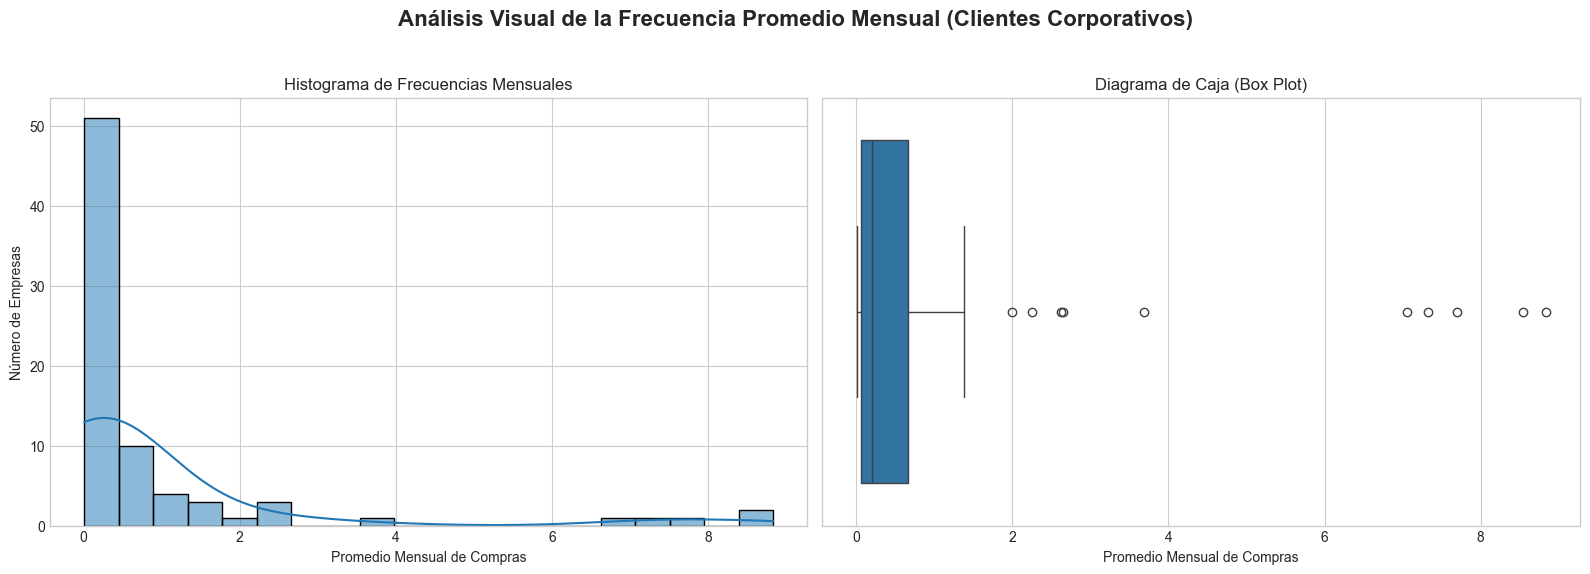


Prueba de Normalidad (Shapiro-Wilk) para Frecuencia Mensual:
Estadístico de la prueba: 0.4995
P-valor: 7.205e-15
Conclusión: La muestra NO sigue una distribución normal.

--- Proceso completado ---


In [30]:
#Promedio mensual de transacciones de los clientes exclusivos corporativos para el periodo 2020 a 2025
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path
import re

# --- PASO 1: DEFINICIÓN DE PARÁMETROS Y FUNCIÓN DE ESTANDARIZACIÓN ---

CORPORATE_KEYWORDS = [
    'SAS', 'S.A.S', 'LTDA', 'LIMITADA', 'SA', 'S.A', 'CIA', 'COMPAÑIA', 
    'E.U', 'EMPRESAS', 'INDUSTRIA', 'SOCIEDAD', 'INVERSIONES', 'COMERCIALIZADORA',
    'GLOBAL', 'GROUP', 'GRUPO', 'DISTRIBUIDORA', 'LICORES'
]

def estandarizar_y_limpiar_nombre(nombre: str) -> str:
    if not isinstance(nombre, str): return ""
    nombre_limpio = nombre.upper().strip()
    patron_eliminar = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
    nombre_limpio = re.sub(patron_eliminar, '', nombre_limpio, flags=re.IGNORECASE)
    nombre_limpio = re.sub(r'[.,;]', '', nombre_limpio)
    nombre_limpio = re.sub(r'\s+', ' ', nombre_limpio).strip()
    return nombre_limpio

# --- PASO 2: CARGA Y CONSOLIDACIÓN DE DATOS REALES ---
print("--- 1. Cargando Datos Reales desde Archivos Excel ---")
try:
    ruta_base = Path("../data/raw") 
    archivos_compras = sorted(ruta_base.glob("compras_dcto_202*.xlsx"))
    if not archivos_compras:
        raise FileNotFoundError("No se encontraron archivos Excel en la ruta especificada.")
    print(f"✔️ Se encontraron {len(archivos_compras)} archivos de compras.")
    df_compras = pd.concat(
        [pd.read_excel(f, engine="openpyxl").assign(anio=int(f.stem.split("_")[-1])) for f in archivos_compras],
        ignore_index=True
    )
    print(f"✔️ Compras cargadas: {df_compras.shape[0]} registros.")
except FileNotFoundError as e:
    print(f"ERROR: {e}")
    exit()

# --- PASO 3: FILTRADO Y CÁLCULO DE MÉTRICAS CORPORATIVAS ---
print("\n--- 2. Preparando Datos Corporativos y Calculando Métricas ---")

patron_filtrado = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
df_empresas = df_compras[df_compras['cliente'].str.contains(patron_filtrado, regex=True, case=False, na=False)].copy()
df_empresas['cliente_estandarizado'] = df_empresas['cliente'].apply(estandarizar_y_limpiar_nombre)

frecuencia_empresas = (
    df_empresas.groupby('cliente_estandarizado')
    .agg(frecuencia_compras_total=('documento', 'nunique'))
    .reset_index()
)
frecuencia_empresas = frecuencia_empresas[frecuencia_empresas['cliente_estandarizado'] != '']

numero_de_anios = df_empresas['anio'].nunique()
total_meses_periodo = numero_de_anios * 12 

if numero_de_anios > 0:
    frecuencia_empresas['frecuencia_compras_promedio_anual'] = (frecuencia_empresas['frecuencia_compras_total'] / numero_de_anios).round(2)
    frecuencia_empresas['frecuencia_compras_promedio_mensual'] = (frecuencia_empresas['frecuencia_compras_total'] / total_meses_periodo).round(2)
else:
    frecuencia_empresas['frecuencia_compras_promedio_anual'] = 0
    frecuencia_empresas['frecuencia_compras_promedio_mensual'] = 0

# --- PASO 4: ANÁLISIS ESTADÍSTICO DE LA FRECUENCIA PROMEDIO MENSUAL ---
print("\n--- 3. Análisis Estadístico de la Frecuencia Promedio Mensual ---")

# Aislamos la columna de frecuencia PROMEDIO MENSUAL
frecuencia_mensual = frecuencia_empresas['frecuencia_compras_promedio_mensual']

# 4.1 Estadísticas Descriptivas
print("\nEstadísticas Fundamentales (Promedio Mensual):")
print(frecuencia_mensual.describe())

# 4.2 Visualización
print("\nGenerando visualización de la distribución mensual...")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Análisis Visual de la Frecuencia Promedio Mensual (Clientes Corporativos)', fontsize=16, weight='bold')

sns.histplot(frecuencia_mensual, kde=True, ax=axes[0], bins=20)
axes[0].set_title('Histograma de Frecuencias Mensuales')
axes[0].set_xlabel('Promedio Mensual de Compras')
axes[0].set_ylabel('Número de Empresas')

sns.boxplot(x=frecuencia_mensual, ax=axes[1])
axes[1].set_title('Diagrama de Caja (Box Plot)')
axes[1].set_xlabel('Promedio Mensual de Compras')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 4.3 Prueba de Normalidad
print("\nPrueba de Normalidad (Shapiro-Wilk) para Frecuencia Mensual:")
shapiro_test_statistic, shapiro_p_value = stats.shapiro(frecuencia_mensual)
print(f"Estadístico de la prueba: {shapiro_test_statistic:.4f}")
print(f"P-valor: {shapiro_p_value:.4g}")
if shapiro_p_value > 0.05:
    print("Conclusión: La muestra podría ser normal.")
else:
    print("Conclusión: La muestra NO sigue una distribución normal.")

print("\n--- Proceso completado ---")

--- 1. Cargando Datos Reales desde Archivos Excel ---
✔️ Se encontraron 6 archivos de compras.
✔️ Compras cargadas: 7052 registros.

--- 2. Preparando Datos Corporativos y Calculando Métricas ---
✔️ Métricas de frecuencia calculadas.

--- 3. Generando Gráfico del Top 15 (Frecuencia Promedio Mensual) ---


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2522/2745670097.py:47: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_empresas = df_compras[df_compras['cliente'].str.contains(patron_filtrado, regex=True, case=False, na=False)].copy()


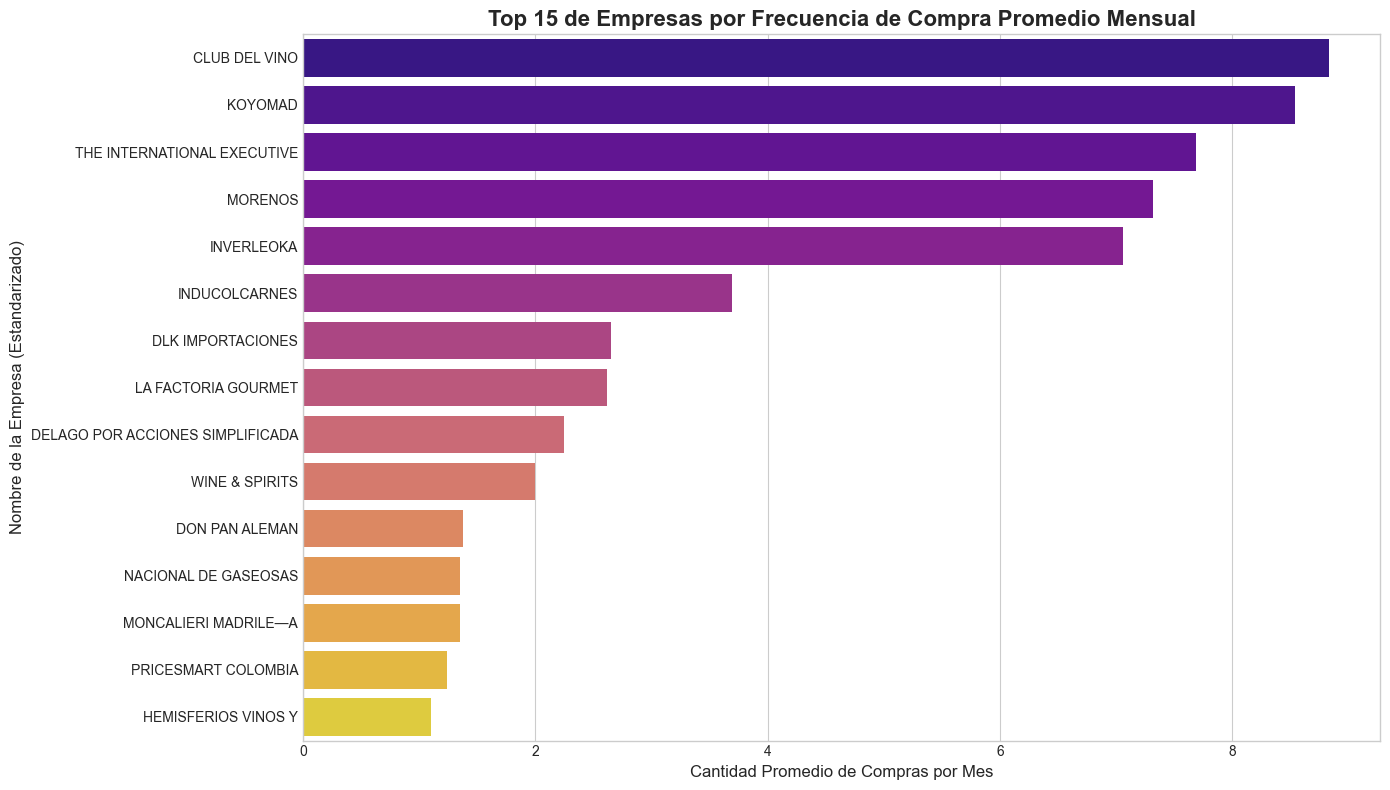


--- Proceso finalizado ---


In [31]:
#Grafico asociado a la frecuencia de promedio mensual 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import re

# --- PASO 1: DEFINICIÓN DE PARÁMETROS Y FUNCIÓN DE ESTANDARIZACIÓN ---

TOP_N = 15 # Definimos el número de empresas para el top
CORPORATE_KEYWORDS = [
    'SAS', 'S.A.S', 'LTDA', 'LIMITADA', 'SA', 'S.A', 'CIA', 'COMPAÑIA', 
    'E.U', 'EMPRESAS', 'INDUSTRIA', 'SOCIEDAD', 'INVERSIONES', 'COMERCIALIZADORA',
    'GLOBAL', 'GROUP', 'GRUPO', 'DISTRIBUIDORA', 'LICORES'
]

def estandarizar_y_limpiar_nombre(nombre: str) -> str:
    if not isinstance(nombre, str): return ""
    nombre_limpio = nombre.upper().strip()
    patron_eliminar = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
    nombre_limpio = re.sub(patron_eliminar, '', nombre_limpio, flags=re.IGNORECASE)
    nombre_limpio = re.sub(r'[.,;]', '', nombre_limpio)
    nombre_limpio = re.sub(r'\s+', ' ', nombre_limpio).strip()
    return nombre_limpio

# --- PASO 2: CARGA Y CONSOLIDACIÓN DE DATOS REALES ---
print("--- 1. Cargando Datos Reales desde Archivos Excel ---")
try:
    ruta_base = Path("../data/raw") 
    archivos_compras = sorted(ruta_base.glob("compras_dcto_202*.xlsx"))
    if not archivos_compras:
        raise FileNotFoundError("No se encontraron archivos Excel en la ruta especificada.")
    print(f"✔️ Se encontraron {len(archivos_compras)} archivos de compras.")
    df_compras = pd.concat(
        [pd.read_excel(f, engine="openpyxl").assign(anio=int(f.stem.split("_")[-1])) for f in archivos_compras],
        ignore_index=True
    )
    print(f"✔️ Compras cargadas: {df_compras.shape[0]} registros.")
except FileNotFoundError as e:
    print(f"ERROR: {e}")
    exit()

# --- PASO 3: FILTRADO Y CÁLCULO DE MÉTRICAS CORPORATIVAS ---
print("\n--- 2. Preparando Datos Corporativos y Calculando Métricas ---")

patron_filtrado = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
df_empresas = df_compras[df_compras['cliente'].str.contains(patron_filtrado, regex=True, case=False, na=False)].copy()
df_empresas['cliente_estandarizado'] = df_empresas['cliente'].apply(estandarizar_y_limpiar_nombre)

frecuencia_empresas = (
    df_empresas.groupby('cliente_estandarizado')
    .agg(frecuencia_compras_total=('documento', 'nunique'))
    .reset_index()
)
frecuencia_empresas = frecuencia_empresas[frecuencia_empresas['cliente_estandarizado'] != '']

numero_de_anios = df_empresas['anio'].nunique()
total_meses_periodo = numero_de_anios * 12 

if numero_de_anios > 0:
    frecuencia_empresas['frecuencia_compras_promedio_anual'] = (frecuencia_empresas['frecuencia_compras_total'] / numero_de_anios).round(2)
    frecuencia_empresas['frecuencia_compras_promedio_mensual'] = (frecuencia_empresas['frecuencia_compras_total'] / total_meses_periodo).round(2)
else:
    frecuencia_empresas['frecuencia_compras_promedio_anual'] = 0
    frecuencia_empresas['frecuencia_compras_promedio_mensual'] = 0
print("✔️ Métricas de frecuencia calculadas.")


# --- PASO 4: VISUALIZACIÓN DEL TOP 15 MENSUAL ---
print("\n--- 3. Generando Gráfico del Top 15 (Frecuencia Promedio Mensual) ---")

# Primero, definimos el Top 15 basándonos en la FRECUENCIA TOTAL para mantener la consistencia del ranking
top_empresas = frecuencia_empresas.sort_values(
    by='frecuencia_compras_total', ascending=False
).head(TOP_N)

# Ahora, creamos el gráfico para estos Top 15, pero visualizando su promedio MENSUAL
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

# --- La modificación clave está aquí, en los parámetros de sns.barplot ---
ax = sns.barplot(
    data=top_empresas,
    x='frecuencia_compras_promedio_mensual',  # <--- VARIABLE CAMBIADA A MENSUAL
    y='cliente_estandarizado',
    palette='plasma', # Usamos otra paleta de color para diferenciar
    hue='cliente_estandarizado',
    dodge=False
)
plt.legend([],[], frameon=False)

# Actualizamos títulos y etiquetas para el nuevo gráfico
plt.title(f'Top {TOP_N} de Empresas por Frecuencia de Compra Promedio Mensual', fontsize=16, weight='bold')
plt.xlabel('Cantidad Promedio de Compras por Mes', fontsize=12) # <--- ETIQUETA CAMBIADA
plt.ylabel('Nombre de la Empresa (Estandarizado)', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

print("\n--- Proceso finalizado ---")

In [23]:
# --- PASO 8: EXPORTACIÓN A EXCEL ---
print("\nExportando el reporte completo a un archivo de Excel...")

# Definimos el nombre del archivo de salida
nombre_archivo_salida = "reporte_frecuencia_clientes_corporativos.xlsx"

# Usamos el método .to_excel()
# index=False es MUY importante para evitar que se escriba una columna extra con el índice del DataFrame.
frecuencia_empresas.to_excel(nombre_archivo_salida, index=False, sheet_name='Frecuencia_Clientes')

print(f"✔️ ¡Éxito! Los resultados han sido guardados en el archivo: '{nombre_archivo_salida}'")


Exportando el reporte completo a un archivo de Excel...
✔️ ¡Éxito! Los resultados han sido guardados en el archivo: 'reporte_frecuencia_clientes_corporativos.xlsx'


In [33]:
import pandas as pd
from pathlib import Path

# --- PASO 1: DEFINIR LA RUTA Y LOS TÉRMINOS DE BÚSQUEDA ---
print("--- Iniciando Verificación de Cencosud en Datos Reales ---")

# Usamos la ruta que me mostraste en tus capturas.
# Este script asume que se ejecuta desde la carpeta 'notebooks'.
ruta_base = Path("../data/raw") 

# Definimos todos los posibles nombres que podrían identificar a Cencosud
terminos_busqueda = ['CENCOSUD', 'JUMBO', 'METRO', 'EASY']
patron_busqueda = '|'.join(terminos_busqueda)


# --- PASO 2: CARGAR TODOS LOS ARCHIVOS DE COMPRAS ---
print(f"\nBuscando archivos de compras en: {ruta_base.resolve()}")

# Buscamos exclusivamente los archivos de compras que hemos estado analizando
archivos_compras = sorted(ruta_base.glob("compras_dcto_202*.xlsx"))

if not archivos_compras:
    print("¡ERROR! No se encontraron archivos de 'compras_dcto...' en la ruta especificada.")
    exit()

print(f"✔️ Se encontraron {len(archivos_compras)} archivos de compras para verificar.")

# Consolidamos todos los archivos en una sola tabla
df_todas_las_compras = pd.concat(
    [pd.read_excel(f, engine="openpyxl") for f in archivos_compras],
    ignore_index=True
)
print(f"✔️ Se cargaron un total de {len(df_todas_las_compras)} registros de todas las compras.")


# --- PASO 3: BÚSQUEDA Y CONTEO DIRECTO ---
print(f"\nBuscando cualquier cliente que contenga: {terminos_busqueda}...")

# Filtramos la tabla completa para encontrar cualquier registro asociado a Cencosud
cencosud_compras = df_todas_las_compras[
    df_todas_las_compras['cliente'].str.contains(patron_busqueda, case=False, na=False)
].copy()


# --- PASO 4: EL MOMENTO DE LA VERDAD ---
if cencosud_compras.empty:
    print("\n----------------------------------------------------")
    print("CONCLUSIÓN DE LA VERIFICACIÓN: NO HAY REGISTROS")
    print("No se encontró absolutamente ningún registro de compra para Cencosud o sus marcas asociadas.")
    print("----------------------------------------------------")
else:
    # Contamos cuántos registros y cuántos documentos únicos encontramos
    num_registros = len(cencosud_compras)
    num_documentos_unicos = cencosud_compras['documento'].nunique()

    print("\n----------------------------------------------------")
    print("CONCLUSIÓN DE LA VERIFICACIÓN: SÍ HAY REGISTROS")
    print(f"Se encontraron un total de {num_registros} líneas de compra.")
    print(f"Los nombres de cliente únicos encontrados fueron: {cencosud_compras['cliente'].unique()}")
    print("\n--- FRECUENCIA DE COMPRA TOTAL REAL ---")
    print(f"El número de documentos (transacciones) únicos para este cliente es: {num_documentos_unicos}")
    print("----------------------------------------------------")

--- Iniciando Verificación de Cencosud en Datos Reales ---

Buscando archivos de compras en: /Users/juanpardo/premium-eda-agent/data/raw
✔️ Se encontraron 6 archivos de compras para verificar.
✔️ Se cargaron un total de 7052 registros de todas las compras.

Buscando cualquier cliente que contenga: ['CENCOSUD', 'JUMBO', 'METRO', 'EASY']...

----------------------------------------------------
CONCLUSIÓN DE LA VERIFICACIÓN: SÍ HAY REGISTROS
Se encontraron un total de 1 líneas de compra.
Los nombres de cliente únicos encontrados fueron: ['CENCOSUD COLOMBIA S.A.']

--- FRECUENCIA DE COMPRA TOTAL REAL ---
El número de documentos (transacciones) únicos para este cliente es: 1
----------------------------------------------------


In [35]:
#Analisis exploratorio de datos para calcular el volumen_monetario_total_2020_2025
#Identificacion y presentacion de las variables mas importantes asociadas
import pandas as pd
from pathlib import Path

# --- FASE 1: DESCUBRIMIENTO DE DATOS (EN 'ventas_dcto') ---
print("--- Paso 1: Cargando un archivo de muestra 'ventas_dcto' para inspección ---")

# La ruta a tus datos
ruta_base = Path("../data/raw") 

try:
    # Buscamos los archivos de resumen de ventas, asegurándonos de excluir los de 'items'
    archivos_ventas_resumen = sorted([f for f in ruta_base.glob("ventas_dcto_202*.xlsx") if '_items' not in f.name])

    if not archivos_ventas_resumen:
        raise FileNotFoundError("No se encontraron archivos 'ventas_dcto_...' (sin items).")
    
    # Tomamos el primer archivo como muestra
    primer_archivo = archivos_ventas_resumen[0]
    print(f"✔️ Archivo de muestra a inspeccionar: '{primer_archivo.name}'")
    
    df_muestra = pd.read_excel(primer_archivo, engine="openpyxl")
    
    # --- ¡ACCIÓN REQUERIDA! ---
    print("\n****************** COLUMNAS DISPONIBLES (Archivo de Resumen de Ventas) ******************")
    print("Busca en esta lista un nombre de columna que represente el valor total de la factura.")
    print("Ejemplos: 'valor_total', 'vr_total', 'neto_factura', 'total_pagar', 'subtotal'.")
    print(df_muestra.columns.tolist())
    print("******************************************************************************************")

    print("\nPrimeras 5 filas del archivo para contexto:")
    print(df_muestra.head())

except (FileNotFoundError, IndexError) as e:
    print(f"ERROR: No se pudo cargar un archivo de muestra. Verifica la ruta. Detalle: {e}")

--- Paso 1: Cargando un archivo de muestra 'ventas_dcto' para inspección ---
✔️ Archivo de muestra a inspeccionar: 'ventas_dcto_2020.xlsx'

****************** COLUMNAS DISPONIBLES (Archivo de Resumen de Ventas) ******************
Busca en esta lista un nombre de columna que represente el valor total de la factura.
Ejemplos: 'valor_total', 'vr_total', 'neto_factura', 'total_pagar', 'subtotal'.
['cod_cliente', 'cliente', 'documento', 'defecha', 'vr_gravado', 'vr_nogravado', 'subtotal', 'costo', 'utilidadps', 'utilidadpc', 'iva', 'total', 'tipodocumento', 'bodega', 'vendedor', 'distrito']
******************************************************************************************

Primeras 5 filas del archivo para contexto:
        cod_cliente                              cliente      documento  \
0          CL 10428                   CLUB DEL VINO LTDA    1NCR      1   
1          CL 10463  A Y M INTERNACIONAL DE COMERCIO SAS    1NCR      3   
2  CL  100000000398               CENCOSUD COL


--- Ejecutando análisis de volumen monetario con las columnas correctas... ---
✔️ Se cargaron un total de 204319 registros de ventas.

--- Top 20 Clientes por Volumen Monetario Total ---
           cod_cliente                                  cliente  \
137   CL  100000000398                   CENCOSUD COLOMBIA S.A.   
1             CL 10003                      ALMACENES EXITO S A   
1196  CL  400000000006                 VENTA MOSTRADOR - P.O.S.   
3094  CL 5200000000001                 VENTA MOSTRADOR - P.O.S.   
229   CL  100000001067               SUPERTIENDAS CA—AVERAL SAS   
754   CL  200000000015                 VENTA MOSTRADOR - P.O.S.   
48            CL 10451                   INVERSIONES EURO S. A.   
788   CL  200000000365                       AMORE GROUP S.A.S.   
2929  CL 1200000000006                 VENTA MOSTRADOR - P.O.S.   
23            CL 10292                         SUPER A LIMITADA   
34            CL 10351                               DLK S.A.S.   
231   CL

/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2522/2510249003.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_15_valor, x='volumen_monetario_total_2020_2025', y=col_cliente, palette='magma')


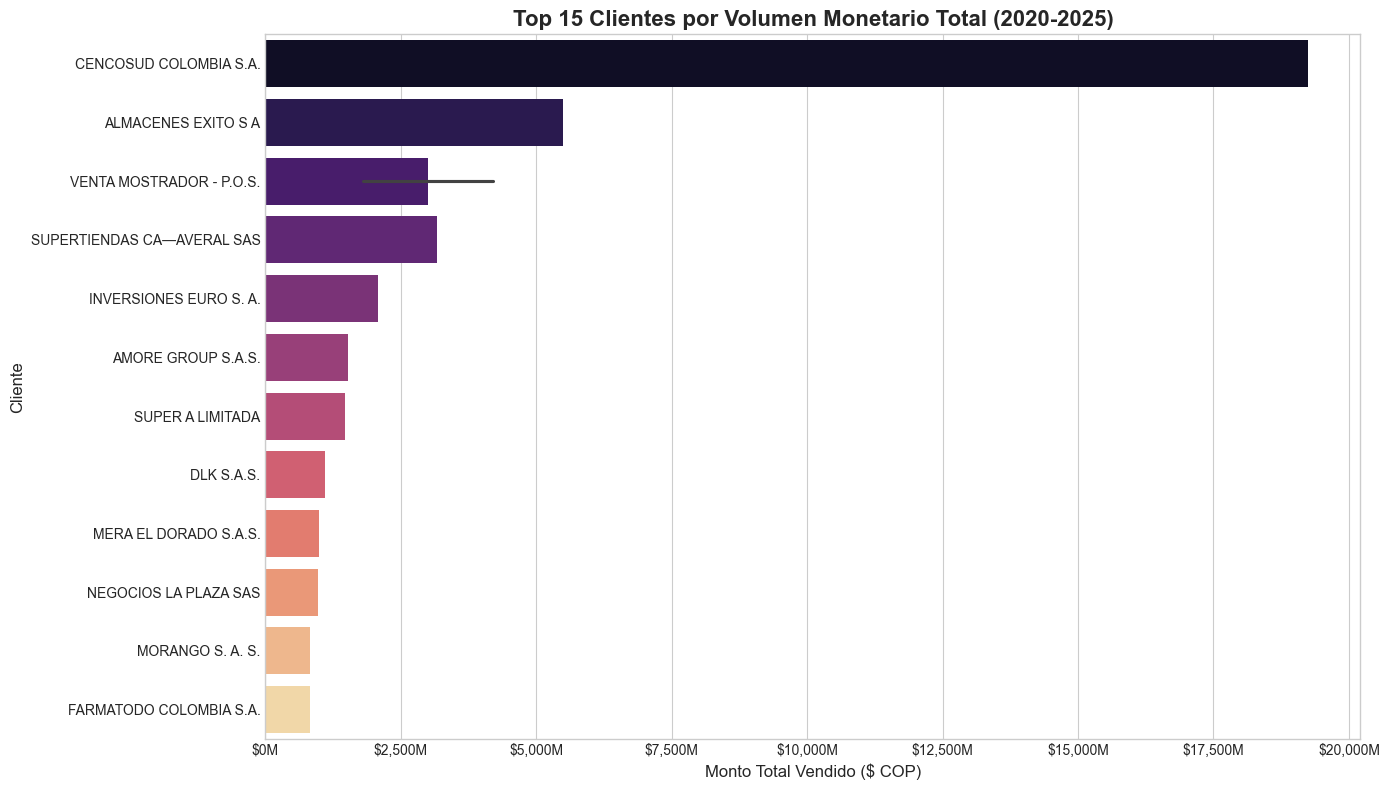

In [36]:
#Generacion y configuracion asociada al analisis monetario para el periodo del horizonte 2020 al 2025
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

# --- FASE 2: CONFIGURACIÓN Y ANÁLISIS FINAL (VOLUMEN MONETARIO) ---

# --- PASO 2: CONFIGURACIÓN DE COLUMNAS ---
# Basado en tu screenshot, hemos identificado las columnas correctas.

col_cliente = 'cliente'
col_cod_cliente = 'cod_cliente'
# Usaremos la columna 'total' que parece ser el valor final de la factura.
col_valor_total_factura = 'total' 

# --- PASO 3: EJECUCIÓN DEL ANÁLISIS COMPLETO ---
print("\n--- Ejecutando análisis de volumen monetario con las columnas correctas... ---")

try:
    # Cargamos TODOS los archivos de resumen de ventas
    ruta_base = Path("../data/raw")
    archivos_ventas_resumen = sorted([f for f in ruta_base.glob("ventas_dcto_202*.xlsx") if '_items' not in f.name])
    if not archivos_ventas_resumen: raise FileNotFoundError("No se encontraron archivos de ventas.")
        
    df_todas_las_ventas = pd.concat(
        [pd.read_excel(f, engine="openpyxl") for f in archivos_ventas_resumen],
        ignore_index=True
    )
    print(f"✔️ Se cargaron un total de {len(df_todas_las_ventas)} registros de ventas.")

    # Agrupamos por cliente y SUMAMOS el VALOR ABSOLUTO de la columna 'total'
    # El .abs() es clave para convertir los valores negativos a positivos.
    volumen_por_cliente = (
        df_todas_las_ventas.groupby([col_cod_cliente, col_cliente])
        .agg(volumen_monetario_total_2020_2025=(col_valor_total_factura, lambda x: x.abs().sum()))
        .reset_index()
    )
    
    volumen_por_cliente_ordenado = volumen_por_cliente.sort_values(
        by='volumen_monetario_total_2020_2025', ascending=False
    )

    # --- Mostrar, Exportar y Visualizar ---
    print("\n--- Top 20 Clientes por Volumen Monetario Total ---")
    print(volumen_por_cliente_ordenado.head(20))

    nombre_archivo_salida = "reporte_volumen_monetario_clientes.xlsx"
    volumen_por_cliente_ordenado.to_excel(nombre_archivo_salida, index=False)
    print(f"\n✔️ Reporte completo guardado en '{nombre_archivo_salida}'")

    top_15_valor = volumen_por_cliente_ordenado.head(15)
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(data=top_15_valor, x='volumen_monetario_total_2020_2025', y=col_cliente, palette='magma')
    ax.xaxis.set_major_formatter(lambda x, pos: f'${x/1e6:,.0f}M') # Formato en Millones de $
    plt.title('Top 15 Clientes por Volumen Monetario Total (2020-2025)', fontsize=16, weight='bold')
    plt.xlabel('Monto Total Vendido ($ COP)', fontsize=12)
    plt.ylabel('Cliente', fontsize=12)
    plt.tight_layout()
    plt.show()

except (FileNotFoundError, KeyError) as e:
    print(f"\nERROR DURANTE LA EJECUCIÓN: {e}")
    print("   Asegúrate de que la ruta sea correcta y que los nombres de las columnas en la sección de configuración sean los correctos.")

--- 1. Cargando y Calculando el Volumen Monetario por Cliente ---
✔️ Se cargaron un total de 204319 registros de ventas.
✔️ Volumen monetario por cliente calculado.

--- 2. Análisis Estadístico del Volumen Monetario Total ---

Estadísticas Fundamentales (Volumen Monetario):
count             4,420.00
mean         15,618,044.93
std         325,919,038.97
min                  37.00
25%             103,611.00
50%             219,750.90
75%             613,345.18
max      19,250,518,587.00
Name: volumen_monetario_total_2020_2025, dtype: object

Otras Medidas de Forma:
Asimetría (Skewness): 49.05
Curtosis (Kurtosis): 2781.02

Generando visualización de la distribución del valor...


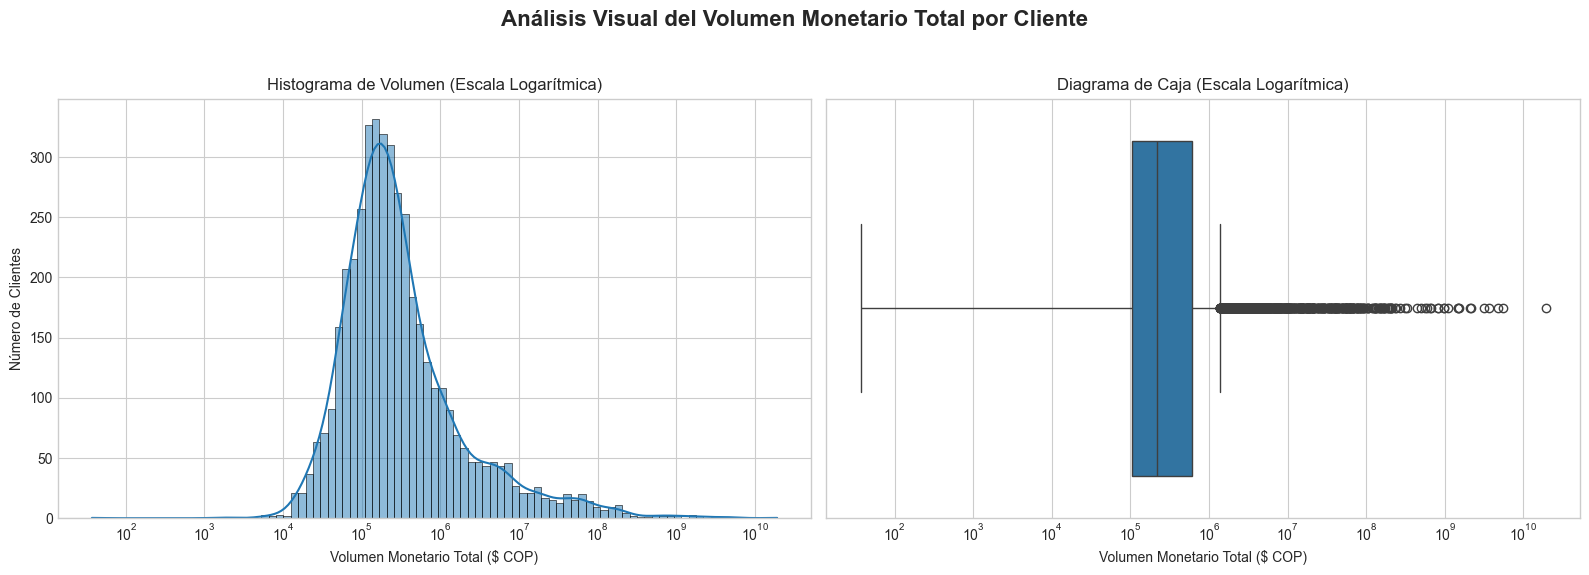


Prueba de Normalidad (Shapiro-Wilk) para Volumen Monetario:
Estadístico de la prueba: 0.0210
P-valor: 4.53e-92
Conclusión: La muestra NO sigue una distribución normal.

--- Proceso completado ---


In [37]:
#Analisis de distribucion y comportamiento de los datos asociados con el volumen monetario total 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path

# --- PASO 1: CARGA Y CÁLCULO DEL VOLUMEN MONETARIO ---
print("--- 1. Cargando y Calculando el Volumen Monetario por Cliente ---")

try:
    # Configuración de ruta y columnas (basado en nuestro último descubrimiento)
    ruta_base = Path("../data/raw")
    col_cliente = 'cliente'
    col_cod_cliente = 'cod_cliente'
    col_valor_total_factura = 'total'

    # Carga de todos los archivos de resumen de ventas
    archivos_ventas_resumen = sorted([f for f in ruta_base.glob("ventas_dcto_202*.xlsx") if '_items' not in f.name])
    if not archivos_ventas_resumen:
        raise FileNotFoundError("No se encontraron archivos 'ventas_dcto...' (sin items).")

    df_todas_las_ventas = pd.concat(
        [pd.read_excel(f, engine="openpyxl") for f in archivos_ventas_resumen],
        ignore_index=True
    )
    print(f"✔️ Se cargaron un total de {len(df_todas_las_ventas)} registros de ventas.")

    # Agrupamos por cliente y sumamos el valor absoluto de la columna 'total'
    volumen_por_cliente = (
        df_todas_las_ventas.groupby([col_cod_cliente, col_cliente])
        .agg(volumen_monetario_total_2020_2025=(col_valor_total_factura, lambda x: x.abs().sum()))
        .reset_index()
    )
    print("✔️ Volumen monetario por cliente calculado.")

except (FileNotFoundError, KeyError) as e:
    print(f"ERROR: {e}")
    exit()

# --- PASO 2: ANÁLISIS ESTADÍSTICO PROFUNDO DEL VOLUMEN MONETARIO ---
print("\n--- 2. Análisis Estadístico del Volumen Monetario Total ---")

# Aislamos la variable que queremos analizar
volumen_monetario = volumen_por_cliente['volumen_monetario_total_2020_2025']

# 2.1 Estadísticas Descriptivas
print("\nEstadísticas Fundamentales (Volumen Monetario):")
print(volumen_monetario.describe().apply(lambda x: f'{x:,.2f}')) # Formateamos para mejor lectura
print("\nOtras Medidas de Forma:")
print(f"Asimetría (Skewness): {volumen_monetario.skew():.2f}")
print(f"Curtosis (Kurtosis): {volumen_monetario.kurt():.2f}")

# 2.2 Visualización de la Distribución
print("\nGenerando visualización de la distribución del valor...")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Análisis Visual del Volumen Monetario Total por Cliente', fontsize=16, weight='bold')

# Histograma: La escala de valor es tan extrema que un gráfico normal no es útil.
# Usaremos una escala logarítmica para poder visualizar la distribución.
sns.histplot(volumen_monetario, kde=True, ax=axes[0], log_scale=True)
axes[0].set_title('Histograma de Volumen (Escala Logarítmica)')
axes[0].set_xlabel('Volumen Monetario Total ($ COP)')
axes[0].set_ylabel('Número de Clientes')

# Box Plot: También en escala logarítmica para ver la distribución de la caja.
sns.boxplot(x=volumen_monetario, ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_title('Diagrama de Caja (Escala Logarítmica)')
axes[1].set_xlabel('Volumen Monetario Total ($ COP)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 2.3 Prueba de Normalidad
print("\nPrueba de Normalidad (Shapiro-Wilk) para Volumen Monetario:")
# Filtramos valores de cero o negativos si los hubiera, ya que el test no los admite
volumen_para_test = volumen_monetario[volumen_monetario > 0]
if not volumen_para_test.empty:
    shapiro_test_statistic, shapiro_p_value = stats.shapiro(volumen_para_test)
    print(f"Estadístico de la prueba: {shapiro_test_statistic:.4f}")
    print(f"P-valor: {shapiro_p_value:.4g}")
    if shapiro_p_value > 0.05:
        print("Conclusión: La muestra podría ser normal.")
    else:
        print("Conclusión: La muestra NO sigue una distribución normal.")
else:
    print("No hay datos positivos para realizar la prueba de normalidad.")

print("\n--- Proceso completado ---")

In [38]:
#Calculo de la frecuencia de ventas en el horizonte de tiempo del 2020 al 2025 con exclusividad en los clientes corporativos
#Generacion de la inspeccion de las columnas y el tipo de dato asociado
import pandas as pd
from pathlib import Path

# --- FASE DE INSPECCIÓN: VERIFICAR COLUMNAS Y TIPOS DE DATO EN 'ventas_dcto' ---
print("--- Paso 1: Cargando un archivo de muestra 'ventas_dcto' para inspección ---")

# La ruta a tus datos
ruta_base = Path("../data/raw") 

try:
    # Buscamos los archivos de resumen de ventas, asegurándonos de excluir los de 'items'
    archivos_ventas_resumen = sorted([f for f in ruta_base.glob("ventas_dcto_202*.xlsx") if '_items' not in f.name])

    if not archivos_ventas_resumen:
        raise FileNotFoundError("No se encontraron archivos 'ventas_dcto...' (sin items) en la ruta especificada.")
    
    # Tomamos solo el primer archivo de la lista como muestra
    primer_archivo = archivos_ventas_resumen[0]
    print(f"✔️ Archivo de muestra a inspeccionar: '{primer_archivo.name}'")
    
    # Cargamos el archivo de muestra
    df_muestra = pd.read_excel(primer_archivo, engine="openpyxl")
    
    # --- RESULTADOS DE LA INSPECCIÓN ---
    
    print("\n****************** 1. LISTA DE COLUMNAS DISPONIBLES ******************")
    print(df_muestra.columns.tolist())
    print("*********************************************************************")

    print("\n****************** 2. TIPOS DE DATO POR COLUMNA ******************")
    # .info() nos da un resumen completo incluyendo el tipo de dato (Dtype)
    df_muestra.info()
    print("******************************************************************")

    print("\n****************** 3. PRIMERAS 5 FILAS (EJEMPLO) ******************")
    print(df_muestra.head())
    print("*******************************************************************")


except (FileNotFoundError, IndexError) as e:
    print(f"ERROR: No se pudo cargar un archivo de muestra. Verifica la ruta. Detalle: {e}")

--- Paso 1: Cargando un archivo de muestra 'ventas_dcto' para inspección ---
✔️ Archivo de muestra a inspeccionar: 'ventas_dcto_2020.xlsx'

****************** 1. LISTA DE COLUMNAS DISPONIBLES ******************
['cod_cliente', 'cliente', 'documento', 'defecha', 'vr_gravado', 'vr_nogravado', 'subtotal', 'costo', 'utilidadps', 'utilidadpc', 'iva', 'total', 'tipodocumento', 'bodega', 'vendedor', 'distrito']
*********************************************************************

****************** 2. TIPOS DE DATO POR COLUMNA ******************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   cod_cliente    761 non-null    object        
 1   cliente        761 non-null    object        
 2   documento      761 non-null    object        
 3   defecha        761 non-null    datetime64[ns]
 4   vr_gravado     761 non-null    float64

--- Iniciando Análisis de Frecuencia de Venta para Clientes Corporativos ---
✔️ Se cargaron un total de 204319 registros de ventas.


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2522/3998281958.py:40: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_todas_las_ventas[col_cliente].str.contains(patron_filtrado, case=False, na=False)


✔️ Se filtraron 24321 registros correspondientes a clientes corporativos.

--- Top 20 Clientes Corporativos por Frecuencia de Venta ---
          cod_cliente                                          cliente  \
63   CL  100000000398                           CENCOSUD COLOMBIA S.A.   
18           CL 10351                                       DLK S.A.S.   
71   CL  100000000502                            NEGOCIOS LA PLAZA SAS   
1            CL 10003                              ALMACENES EXITO S A   
114  CL  100000001067                       SUPERTIENDAS CA—AVERAL SAS   
23           CL 10451                           INVERSIONES EURO S. A.   
358  CL  200000000365                               AMORE GROUP S.A.S.   
22           CL 10428                               CLUB DEL VINO LTDA   
225  CL  100000001646                                 SALOMON LAMA SAS   
14           CL 10292                                 SUPER A LIMITADA   
125  CL  100000001136                             

/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2522/3998281958.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_15_frecuencia, x='frecuencia_ventas_2020_2025', y=col_cliente, palette='viridis')


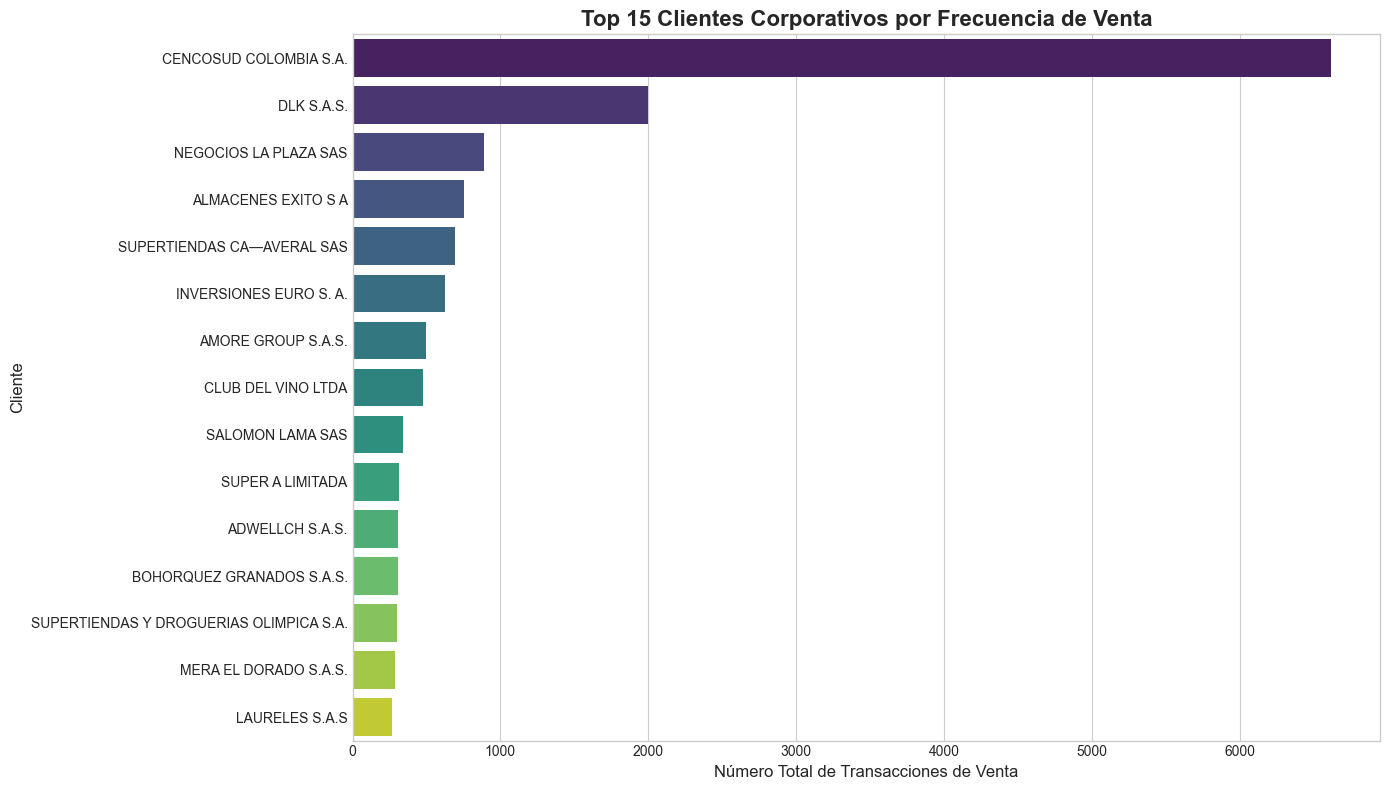

In [39]:
#Continuacion del codigo enfocandonos en los clientes corporativos asociados para el calculo de la frecuencia de ventas periodo 2020 a 2025
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import re

# --- PASO 1: CONFIGURACIÓN Y PARÁMETROS ---
print("--- Iniciando Análisis de Frecuencia de Venta para Clientes Corporativos ---")

# Lista de palabras clave para identificar empresas
CORPORATE_KEYWORDS = [
    'SAS', 'S.A.S', 'LTDA', 'LIMITADA', 'SA', 'S.A', 'CIA', 'COMPAÑIA', 
    'E.U', 'EMPRESAS', 'INDUSTRIA', 'SOCIEDAD', 'INVERSIONES', 'COMERCIALIZADORA',
    'GLOBAL', 'GROUP', 'GRUPO', 'DISTRIBUIDORA', 'LICORES'
]

# Nombres de las columnas validados en el paso de inspección
col_cliente = 'cliente'
col_cod_cliente = 'cod_cliente'
col_documento = 'documento'

# --- PASO 2: CARGA Y FILTRADO DE DATOS DE VENTAS ---
try:
    # Cargamos TODOS los archivos de resumen de ventas
    ruta_base = Path("../data/raw")
    archivos_ventas = sorted([f for f in ruta_base.glob("ventas_dcto_202*.xlsx") if '_items' not in f.name])
    if not archivos_ventas:
        raise FileNotFoundError("No se encontraron archivos de ventas.")
        
    df_todas_las_ventas = pd.concat(
        [pd.read_excel(f, engine="openpyxl") for f in archivos_ventas],
        ignore_index=True
    )
    print(f"✔️ Se cargaron un total de {len(df_todas_las_ventas)} registros de ventas.")

    # --- APLICAMOS EL FILTRO CORPORATIVO ---
    patron_filtrado = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
    df_ventas_corp = df_todas_las_ventas[
        df_todas_las_ventas[col_cliente].str.contains(patron_filtrado, case=False, na=False)
    ].copy()
    print(f"✔️ Se filtraron {len(df_ventas_corp)} registros correspondientes a clientes corporativos.")

    # --- PASO 3: CÁLCULO DE LA FRECUENCIA DE VENTA ---
    # Agrupamos los datos corporativos y contamos sus transacciones únicas
    frecuencia_ventas_corp = (
        df_ventas_corp.groupby([col_cod_cliente, col_cliente])
        .agg(frecuencia_ventas_2020_2025=(col_documento, 'nunique'))
        .reset_index()
    )
    
    frecuencia_ventas_corp_ordenado = frecuencia_ventas_corp.sort_values(
        by='frecuencia_ventas_2020_2025', ascending=False
    )

    # --- PASO 4: MOSTRAR, EXPORTAR Y VISUALIZAR ---
    print("\n--- Top 20 Clientes Corporativos por Frecuencia de Venta ---")
    print(frecuencia_ventas_corp_ordenado.head(20))

    nombre_archivo_salida = "reporte_frecuencia_ventas_corporativas.xlsx"
    frecuencia_ventas_corp_ordenado.to_excel(nombre_archivo_salida, index=False)
    print(f"\n✔️ Reporte de frecuencia de ventas corporativas guardado en '{nombre_archivo_salida}'")

    top_15_frecuencia = frecuencia_ventas_corp_ordenado.head(15)
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(data=top_15_frecuencia, x='frecuencia_ventas_2020_2025', y=col_cliente, palette='viridis')
    plt.title('Top 15 Clientes Corporativos por Frecuencia de Venta', fontsize=16, weight='bold')
    plt.xlabel('Número Total de Transacciones de Venta', fontsize=12)
    plt.ylabel('Cliente', fontsize=12)
    plt.tight_layout()
    plt.show()

except (FileNotFoundError, KeyError) as e:
    print(f"\nERROR DURANTE LA EJECUCIÓN: {e}")
    print("   Asegúrate de que la ruta sea correcta y que los nombres de las columnas sean los correctos.")

--- Iniciando Análisis Estadístico de Frecuencia de Venta para Clientes Corporativos ---
✔️ Se cargaron un total de 204319 registros de ventas.


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2522/2146073644.py:34: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_ventas_corp = df_ventas[df_ventas[col_cliente].str.contains(patron_filtrado, case=False, na=False)].copy()


✔️ Se filtraron 24321 registros correspondientes a clientes corporativos.
✔️ Variable de frecuencia de venta corporativa lista para el análisis.

--- 4. Análisis Estadístico Descriptivo (Frecuencia de Venta Corporativa) ---

Estadísticas Fundamentales:
count      398.00
mean        61.11
std        357.21
min          1.00
25%          2.00
50%          7.00
75%         28.00
max      6,619.00
Name: frecuencia_total, dtype: object

Otras Medidas de Forma:
Asimetría (Skewness): 16.15
Curtosis (Kurtosis): 289.83

Generando visualización de la distribución de frecuencia de venta...


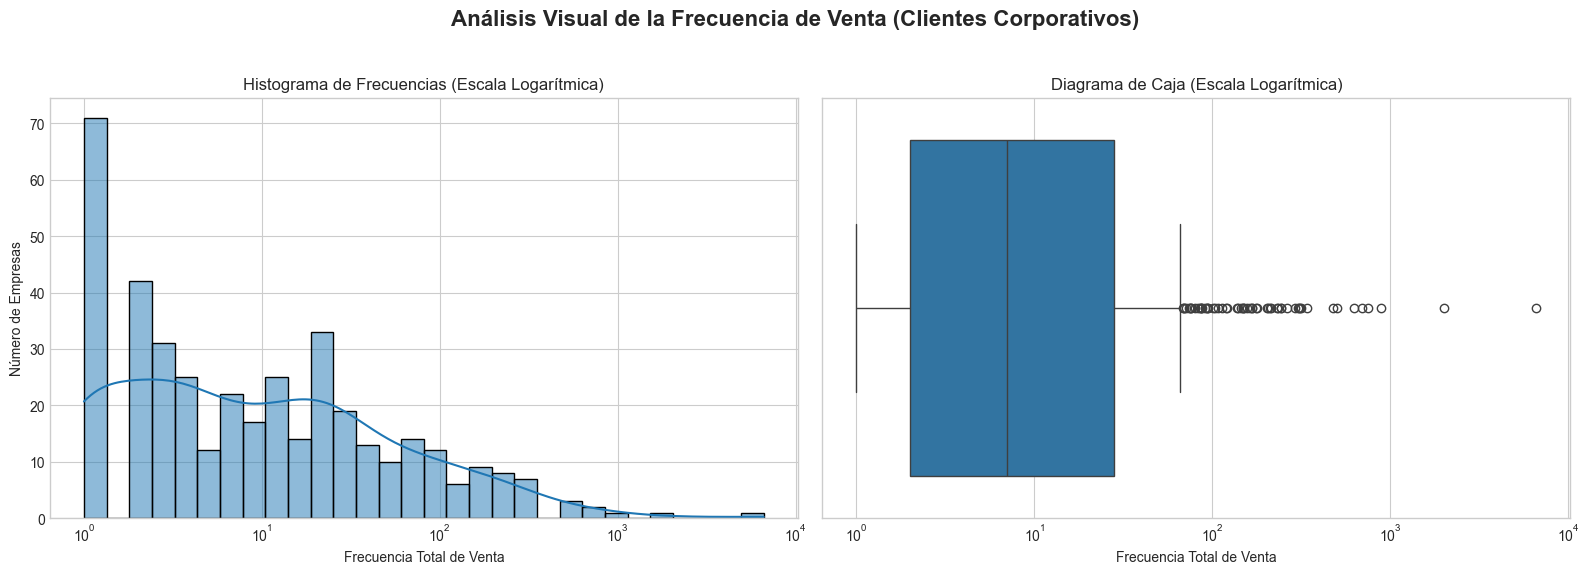


Prueba de Normalidad (Shapiro-Wilk):
Estadístico de la prueba: 0.1220
P-valor: 3.433e-39
Conclusión: La muestra NO sigue una distribución normal.

--- Proceso completado ---


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path
import re

# --- PASO 1: CONFIGURACIÓN Y PARÁMETROS ---
print("--- Iniciando Análisis Estadístico de Frecuencia de Venta para Clientes Corporativos ---")

CORPORATE_KEYWORDS = [
    'SAS', 'S.A.S', 'LTDA', 'LIMITADA', 'SA', 'S.A', 'CIA', 'COMPAÑIA', 
    'E.U', 'EMPRESAS', 'INDUSTRIA', 'SOCIEDAD', 'INVERSIONES', 'COMERCIALIZADORA',
    'GLOBAL', 'GROUP', 'GRUPO', 'DISTRIBUIDORA', 'LICORES'
]
col_cliente = 'cliente'
col_cod_cliente = 'cod_cliente'
col_documento = 'documento'

# --- PASO 2: CARGA Y FILTRADO DE DATOS DE VENTAS ---
try:
    ruta_base = Path("../data/raw")
    archivos_ventas = sorted([f for f in ruta_base.glob("ventas_dcto_202*.xlsx") if '_items' not in f.name])
    if not archivos_ventas:
        raise FileNotFoundError("No se encontraron archivos de ventas.")

    df_ventas = pd.concat(
        [pd.read_excel(f, engine="openpyxl") for f in archivos_ventas],
        ignore_index=True
    )
    print(f"✔️ Se cargaron un total de {len(df_ventas)} registros de ventas.")

    patron_filtrado = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
    df_ventas_corp = df_ventas[df_ventas[col_cliente].str.contains(patron_filtrado, case=False, na=False)].copy()
    print(f"✔️ Se filtraron {len(df_ventas_corp)} registros correspondientes a clientes corporativos.")

except (FileNotFoundError, KeyError) as e:
    print(f"ERROR al cargar o filtrar los datos: {e}")
    exit()

# --- PASO 3: CÁLCULO DE LA FRECUENCIA DE VENTA CORPORATIVA ---
frecuencia_ventas_corp = (
    df_ventas_corp.groupby([col_cod_cliente, col_cliente])
    .agg(frecuencia_total=(col_documento, 'nunique'))
    .reset_index()
)

# Aislamos la variable que queremos analizar
frecuencia_a_analizar = frecuencia_ventas_corp['frecuencia_total']
print("✔️ Variable de frecuencia de venta corporativa lista para el análisis.")

# --- PASO 4: ANÁLISIS ESTADÍSTICO PROFUNDO ---
print("\n--- 4. Análisis Estadístico Descriptivo (Frecuencia de Venta Corporativa) ---")

# 4.1 Estadísticas Descriptivas
print("\nEstadísticas Fundamentales:")
print(frecuencia_a_analizar.describe().apply(lambda x: f'{x:,.2f}'))
print("\nOtras Medidas de Forma:")
print(f"Asimetría (Skewness): {frecuencia_a_analizar.skew():.2f}")
print(f"Curtosis (Kurtosis): {frecuencia_a_analizar.kurt():.2f}")

# 4.2 Visualización de la Distribución
print("\nGenerando visualización de la distribución de frecuencia de venta...")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Análisis Visual de la Frecuencia de Venta (Clientes Corporativos)', fontsize=16, weight='bold')

sns.histplot(frecuencia_a_analizar, kde=True, ax=axes[0], bins=30, log_scale=True)
axes[0].set_title('Histograma de Frecuencias (Escala Logarítmica)')
axes[0].set_xlabel('Frecuencia Total de Venta')
axes[0].set_ylabel('Número de Empresas')

sns.boxplot(x=frecuencia_a_analizar, ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_title('Diagrama de Caja (Escala Logarítmica)')
axes[1].set_xlabel('Frecuencia Total de Venta')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 4.3 Prueba de Normalidad
print("\nPrueba de Normalidad (Shapiro-Wilk):")
stat, p_valor = stats.shapiro(frecuencia_a_analizar)
print(f"Estadístico de la prueba: {stat:.4f}")
print(f"P-valor: {p_valor:.4g}")
if p_valor > 0.05:
    print("Conclusión: La muestra podría ser normal.")
else:
    print("Conclusión: La muestra NO sigue una distribución normal.")

print("\n--- Proceso completado ---")

--- Iniciando Análisis de Frecuencia de Venta para Clientes Corporativos ---
✔️ Se encontraron 12 archivos de ventas.
✔️ Se cargaron un total de 204319 registros de ventas con año válido.

--- Aplicando filtro para Clientes Corporativos ---


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2522/3989567431.py:50: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_ventas_corp = df_ventas[df_ventas['cliente'].str.contains(patron_filtrado, case=False, na=False)].copy()


✔️ Se encontraron 24321 registros de ventas de clientes corporativos.

--- Calculando métricas para el segmento corporativo ---
✔️ El período de análisis para clientes corporativos abarca 6 años únicos.
✔️ Métrica de promedio anual calculada.

✔️ Reporte de clientes CORPORATIVOS guardado en 'reporte_frecuencia_anual_clientes_CORPORATIVOS_ventas.xlsx'


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2522/3989567431.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_15_corp, x='frecuencia_ventas_promedio_anual_2020_2025', y=col_cliente, palette='crest')


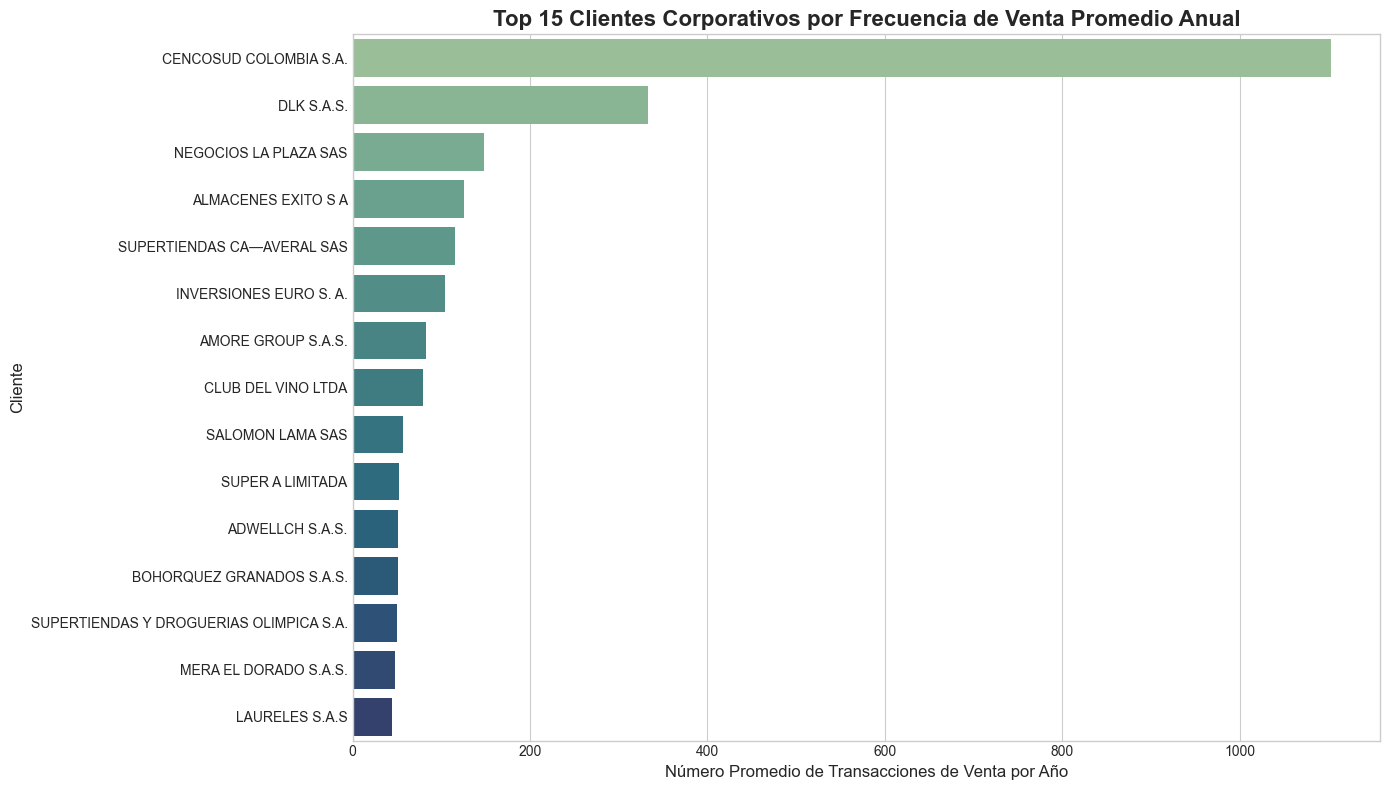


--- Proceso completado. ---


In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import re

# --- PASO 1: CONFIGURACIÓN Y PARÁMETROS ---
print("--- Iniciando Análisis de Frecuencia de Venta para Clientes Corporativos ---")

# Lista de palabras clave para el filtro corporativo
CORPORATE_KEYWORDS = [
    'SAS', 'S.A.S', 'LTDA', 'LIMITADA', 'SA', 'S.A', 'CIA', 'COMPAÑIA', 
    'E.U', 'EMPRESAS', 'INDUSTRIA', 'SOCIEDAD', 'INVERSIONES', 'COMERCIALIZADORA',
    'GLOBAL', 'GROUP', 'GRUPO', 'DISTRIBUIDORA', 'LICORES'
]

# Función auxiliar para extraer el año de forma segura
def extraer_anio_del_nombre(nombre_archivo: str) -> int:
    match = re.search(r'20\d{2}', str(nombre_archivo))
    if match:
        return int(match.group(0))
    return None

# --- PASO 2: CARGA DE DATOS DE VENTAS ---
try:
    ruta_base = Path("../data/raw")
    archivos_ventas = sorted([f for f in ruta_base.glob("ventas_dcto_202*.xlsx") if '_items' not in f.name])
    if not archivos_ventas:
        raise FileNotFoundError("No se encontraron archivos 'ventas_dcto...' (sin items).")

    print(f"✔️ Se encontraron {len(archivos_ventas)} archivos de ventas.")
    
    df_ventas = pd.concat(
        [pd.read_excel(f, engine="openpyxl").assign(anio=extraer_anio_del_nombre(f.name)) for f in archivos_ventas],
        ignore_index=True
    )
    
    df_ventas.dropna(subset=['anio'], inplace=True)
    df_ventas['anio'] = df_ventas['anio'].astype(int)
    print(f"✔️ Se cargaron un total de {len(df_ventas)} registros de ventas con año válido.")

except (FileNotFoundError, KeyError) as e:
    print(f"ERROR al cargar los datos: {e}")
    exit()

# --- PASO 3: APLICACIÓN DEL FILTRO CORPORATIVO ---
print("\n--- Aplicando filtro para Clientes Corporativos ---")
patron_filtrado = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
# Usamos el DataFrame original 'df_ventas' y creamos uno nuevo solo con empresas
df_ventas_corp = df_ventas[df_ventas['cliente'].str.contains(patron_filtrado, case=False, na=False)].copy()
print(f"✔️ Se encontraron {len(df_ventas_corp)} registros de ventas de clientes corporativos.")


# --- PASO 4: CÁLCULO DE MÉTRICAS (SOBRE DATOS FILTRADOS) ---
print("\n--- Calculando métricas para el segmento corporativo ---")

col_cliente = 'cliente'
col_cod_cliente = 'cod_cliente'
col_documento = 'documento'

# La agregación ahora se hace sobre el DataFrame filtrado: 'df_ventas_corp'
analisis_clientes_corp = (
    df_ventas_corp.groupby([col_cod_cliente, col_cliente])
    .agg(frecuencia_total=(col_documento, 'nunique'))
    .reset_index()
)

# El número de años se calcula sobre los datos filtrados para mayor precisión
numero_de_anios = df_ventas_corp['anio'].nunique()
if numero_de_anios > 0:
    print(f"✔️ El período de análisis para clientes corporativos abarca {numero_de_anios} años únicos.")
    analisis_clientes_corp['frecuencia_ventas_promedio_anual_2020_2025'] = (
        analisis_clientes_corp['frecuencia_total'] / numero_de_anios
    ).round(2)
    print("✔️ Métrica de promedio anual calculada.")
else:
    analisis_clientes_corp['frecuencia_ventas_promedio_anual_2020_2025'] = 0

# --- PASO 5: EXPORTAR Y VISUALIZAR (RESULTADOS CORPORATIVOS) ---
reporte_final_corp = analisis_clientes_corp.sort_values(by='frecuencia_total', ascending=False)
nombre_archivo_salida = "reporte_frecuencia_anual_clientes_CORPORATIVOS_ventas.xlsx"
reporte_final_corp.to_excel(nombre_archivo_salida, index=False)
print(f"\n✔️ Reporte de clientes CORPORATIVOS guardado en '{nombre_archivo_salida}'")

top_15_corp = reporte_final_corp.head(15)
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=top_15_corp, x='frecuencia_ventas_promedio_anual_2020_2025', y=col_cliente, palette='crest')
plt.title('Top 15 Clientes Corporativos por Frecuencia de Venta Promedio Anual', fontsize=16, weight='bold')
plt.xlabel('Número Promedio de Transacciones de Venta por Año', fontsize=12)
plt.ylabel('Cliente', fontsize=12)
plt.tight_layout()
plt.show()

print("\n--- Proceso completado. ---")


--- Iniciando Análisis Estadístico de Frecuencia Anual para Clientes Corporativos ---
✔️ Se cargaron 204319 registros de ventas con año válido.


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2522/4173153466.py:40: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_ventas_corp = df_ventas[df_ventas[col_cliente].str.contains(patron_filtrado, case=False, na=False)].copy()


✔️ Se filtraron 24321 registros de clientes corporativos.
✔️ Métrica de promedio anual calculada.

--- 3. Análisis Estadístico de la Frecuencia Promedio Anual ---

Estadísticas Fundamentales (Promedio Anual Corporativo):
count      398.00
mean        10.19
std         59.54
min          0.17
25%          0.33
50%          1.17
75%          4.67
max      1,103.17
Name: frecuencia_ventas_promedio_anual, dtype: object

Otras Medidas de Forma:
Asimetría (Skewness): 16.15
Curtosis (Kurtosis): 289.83

Generando visualización de la distribución...


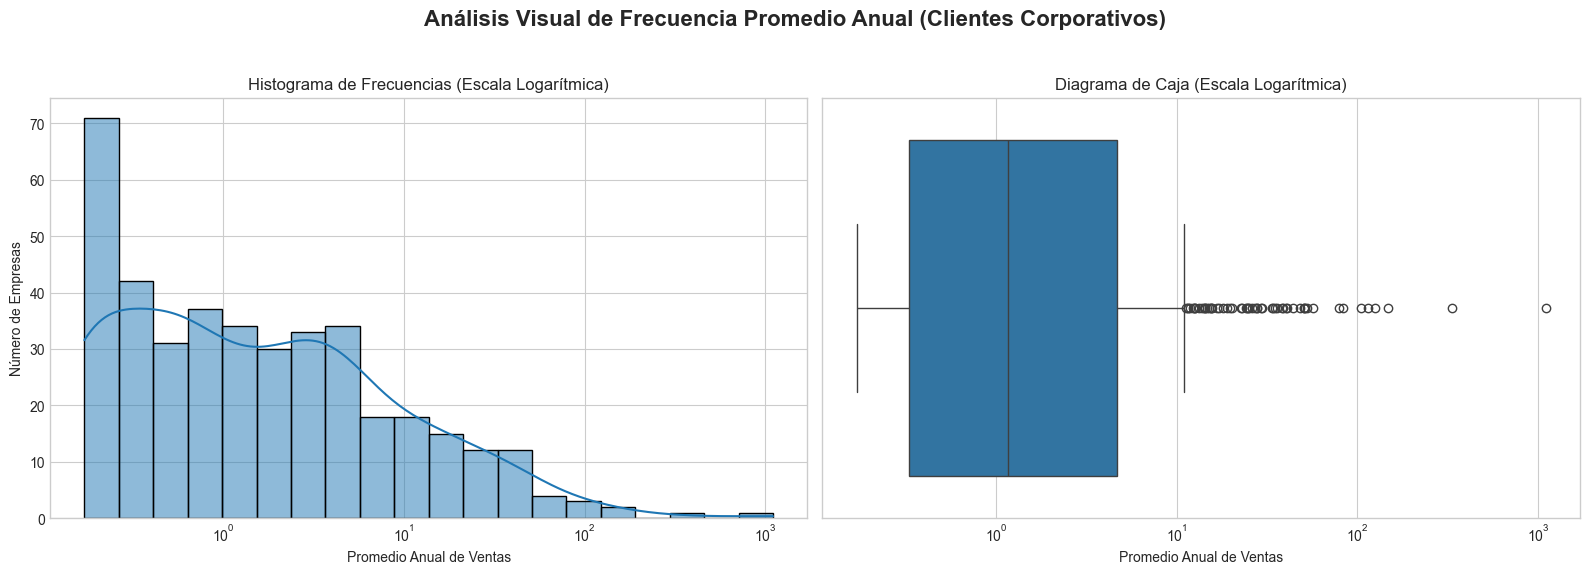


Prueba de Normalidad (Shapiro-Wilk):
Estadístico de la prueba: 0.1220
P-valor: 3.432e-39
Conclusión: La muestra NO sigue una distribución normal.

--- Proceso completado ---


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path
import re

# --- PASO 1: CONFIGURACIÓN Y PREPARACIÓN ---
print("--- Iniciando Análisis Estadístico de Frecuencia Anual para Clientes Corporativos ---")

CORPORATE_KEYWORDS = [
    'SAS', 'S.A.S', 'LTDA', 'LIMITADA', 'SA', 'S.A', 'CIA', 'COMPAÑIA', 
    'E.U', 'EMPRESAS', 'INDUSTRIA', 'SOCIEDAD', 'INVERSIONES', 'COMERCIALIZADORA',
    'GLOBAL', 'GROUP', 'GRUPO', 'DISTRIBUIDORA', 'LICORES'
]
col_cliente = 'cliente'
col_cod_cliente = 'cod_cliente'
col_documento = 'documento'

def extraer_anio_del_nombre(nombre_archivo: str) -> int:
    match = re.search(r'20\d{2}', str(nombre_archivo))
    if match: return int(match.group(0))
    return None

# --- PASO 2: CARGA, FILTRADO Y CÁLCULO DE MÉTRICAS ---
try:
    ruta_base = Path("../data/raw")
    archivos_ventas = sorted([f for f in ruta_base.glob("ventas_dcto_202*.xlsx") if '_items' not in f.name])
    if not archivos_ventas: raise FileNotFoundError("No se encontraron archivos de ventas.")
        
    df_ventas = pd.concat(
        [pd.read_excel(f, engine="openpyxl").assign(anio=extraer_anio_del_nombre(f.name)) for f in archivos_ventas],
        ignore_index=True
    )
    df_ventas.dropna(subset=['anio'], inplace=True)
    df_ventas['anio'] = df_ventas['anio'].astype(int)
    print(f"✔️ Se cargaron {len(df_ventas)} registros de ventas con año válido.")

    patron_filtrado = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
    df_ventas_corp = df_ventas[df_ventas[col_cliente].str.contains(patron_filtrado, case=False, na=False)].copy()
    print(f"✔️ Se filtraron {len(df_ventas_corp)} registros de clientes corporativos.")

    analisis_clientes_corp = (
        df_ventas_corp.groupby([col_cod_cliente, col_cliente])
        .agg(frecuencia_total=(col_documento, 'nunique'))
        .reset_index()
    )
    
    numero_de_anios = df_ventas_corp['anio'].nunique()
    if numero_de_anios > 0:
        analisis_clientes_corp['frecuencia_ventas_promedio_anual'] = (
            analisis_clientes_corp['frecuencia_total'] / numero_de_anios
        ).round(2)
        print("✔️ Métrica de promedio anual calculada.")
    else:
        analisis_clientes_corp['frecuencia_ventas_promedio_anual'] = 0

except (FileNotFoundError, KeyError) as e:
    print(f"ERROR: {e}")
    exit()

# --- PASO 3: ANÁLISIS ESTADÍSTICO PROFUNDO SOBRE EL PROMEDIO ANUAL ---
print("\n--- 3. Análisis Estadístico de la Frecuencia Promedio Anual ---")

# Aislamos la variable que queremos analizar
frecuencia_anual_corp = analisis_clientes_corp['frecuencia_ventas_promedio_anual']

# 3.1 Estadísticas Descriptivas
print("\nEstadísticas Fundamentales (Promedio Anual Corporativo):")
print(frecuencia_anual_corp.describe().apply(lambda x: f'{x:,.2f}'))
print("\nOtras Medidas de Forma:")
print(f"Asimetría (Skewness): {frecuencia_anual_corp.skew():.2f}")
print(f"Curtosis (Kurtosis): {frecuencia_anual_corp.kurt():.2f}")

# 3.2 Visualización
print("\nGenerando visualización de la distribución...")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Análisis Visual de Frecuencia Promedio Anual (Clientes Corporativos)', fontsize=16, weight='bold')

sns.histplot(frecuencia_anual_corp, kde=True, ax=axes[0], bins=20, log_scale=True)
axes[0].set_title('Histograma de Frecuencias (Escala Logarítmica)')
axes[0].set_xlabel('Promedio Anual de Ventas')
axes[0].set_ylabel('Número de Empresas')

sns.boxplot(x=frecuencia_anual_corp, ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_title('Diagrama de Caja (Escala Logarítmica)')
axes[1].set_xlabel('Promedio Anual de Ventas')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 3.3 Prueba de Normalidad
print("\nPrueba de Normalidad (Shapiro-Wilk):")
stat, p_valor = stats.shapiro(frecuencia_anual_corp[frecuencia_anual_corp > 0]) # Test sobre valores > 0
print(f"Estadístico de la prueba: {stat:.4f}")
print(f"P-valor: {p_valor:.4g}")
if p_valor > 0.05: print("Conclusión: La muestra podría ser normal.")
else: print("Conclusión: La muestra NO sigue una distribución normal.")

print("\n--- Proceso completado ---")

In [47]:
#Calculo de la frecuencia de ventas promedio mensual 
import pandas as pd
from pathlib import Path
import re

# --- PASO 1: CONFIGURACIÓN Y PREPARACIÓN ---
print("--- Iniciando Cálculo de Métricas de Frecuencia para Clientes Corporativos ---")

CORPORATE_KEYWORDS = [
    'SAS', 'S.A.S', 'LTDA', 'LIMITADA', 'SA', 'S.A', 'CIA', 'COMPAÑIA', 
    'E.U', 'EMPRESAS', 'INDUSTRIA', 'SOCIEDAD', 'INVERSIONES', 'COMERCIALIZADORA',
    'GLOBAL', 'GROUP', 'GRUPO', 'DISTRIBUIDORA', 'LICORES'
]
col_cliente = 'cliente'
col_cod_cliente = 'cod_cliente'
col_documento = 'documento'

def extraer_anio_del_nombre(nombre_archivo: str) -> int:
    match = re.search(r'20\d{2}', str(nombre_archivo))
    if match: return int(match.group(0))
    return None

# --- PASO 2: CARGA Y FILTRADO DE DATOS DE VENTAS ---
try:
    ruta_base = Path("../data/raw")
    archivos_ventas = sorted([f for f in ruta_base.glob("ventas_dcto_202*.xlsx") if '_items' not in f.name])
    if not archivos_ventas:
        raise FileNotFoundError("No se encontraron archivos de ventas.")

    print(f"✔️ Se encontraron {len(archivos_ventas)} archivos de ventas.")
    
    df_ventas = pd.concat(
        [pd.read_excel(f, engine="openpyxl").assign(anio=extraer_anio_del_nombre(f.name)) for f in archivos_ventas],
        ignore_index=True
    )
    df_ventas.dropna(subset=['anio'], inplace=True)
    df_ventas['anio'] = df_ventas['anio'].astype(int)
    print(f"✔️ Se cargaron un total de {len(df_ventas)} registros de ventas con año válido.")

    patron_filtrado = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
    df_ventas_corp = df_ventas[df_ventas[col_cliente].str.contains(patron_filtrado, case=False, na=False)].copy()
    print(f"✔️ Se filtraron {len(df_ventas_corp)} registros de clientes corporativos.")

except (FileNotFoundError, KeyError) as e:
    print(f"ERROR al cargar o filtrar los datos: {e}")
    exit()

# --- PASO 3: CÁLCULO DE TODAS LAS MÉTRICAS DE FRECUENCIA ---
print("\n--- Calculando métricas para el segmento corporativo ---")

analisis_clientes_corp = (
    df_ventas_corp.groupby([col_cod_cliente, col_cliente])
    .agg(frecuencia_total=(col_documento, 'nunique'))
    .reset_index()
)

numero_de_anios = df_ventas_corp['anio'].nunique()
if numero_de_anios > 0:
    total_meses = numero_de_anios * 12
    analisis_clientes_corp['frecuencia_promedio_anual'] = (analisis_clientes_corp['frecuencia_total'] / numero_de_anios).round(2)
    # Renombramos la columna para que coincida con tu screenshot
    analisis_clientes_corp.rename(columns={'frecuencia_promedio_mensual': 'frecuencia_compras_promedio_mensual_2020_2025'}, inplace=True)
    analisis_clientes_corp['frecuencia_compras_promedio_mensual_2020_2025'] = (analisis_clientes_corp['frecuencia_total'] / total_meses).round(2)
    print("✔️ Métricas de frecuencia calculadas.")
else:
    analisis_clientes_corp['frecuencia_promedio_anual'] = 0
    analisis_clientes_corp['frecuencia_compras_promedio_mensual_2020_2025'] = 0


# --- PASO 4: MOSTRAR Y EXPORTAR LOS DATOS CALCULADOS ---
reporte_final = analisis_clientes_corp.sort_values(by='frecuencia_total', ascending=False)

print("\n****************** DATOS CALCULADOS DE FRECUENCIA (CORPORATIVOS) ******************")
# Usamos pd.option_context para asegurar que se muestren todas las filas y no se trunque la salida
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):
    print(reporte_final)
print("**********************************************************************************")

# Exportamos el reporte a Excel
nombre_archivo_salida = "reporte_todas_las_frecuencias_corporativas.xlsx"
reporte_final.to_excel(nombre_archivo_salida, index=False)
print(f"\n✔️ Datos completos guardados en el archivo: '{nombre_archivo_salida}'")

print("\n--- Proceso completado ---")

--- Iniciando Cálculo de Métricas de Frecuencia para Clientes Corporativos ---
✔️ Se encontraron 12 archivos de ventas.
✔️ Se cargaron un total de 204319 registros de ventas con año válido.


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2522/451644143.py:40: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_ventas_corp = df_ventas[df_ventas[col_cliente].str.contains(patron_filtrado, case=False, na=False)].copy()


✔️ Se filtraron 24321 registros de clientes corporativos.

--- Calculando métricas para el segmento corporativo ---
✔️ Métricas de frecuencia calculadas.

****************** DATOS CALCULADOS DE FRECUENCIA (CORPORATIVOS) ******************
          cod_cliente                                            cliente  frecuencia_total  frecuencia_promedio_anual  frecuencia_compras_promedio_mensual_2020_2025
63   CL  100000000398                             CENCOSUD COLOMBIA S.A.              6619                    1103.17                                          91.93
18           CL 10351                                         DLK S.A.S.              1996                     332.67                                          27.72
71   CL  100000000502                              NEGOCIOS LA PLAZA SAS               889                     148.17                                          12.35
1            CL 10003                                ALMACENES EXITO S A               751           

--- Iniciando Análisis Completo: Estadísticas y Gráfico Mensual Corporativo ---
✔️ Se cargaron 204319 registros de ventas con año válido.


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2522/2546116354.py:44: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_ventas_corp = df_ventas[df_ventas[col_cliente].str.contains(patron_filtrado, case=False, na=False)].copy()


✔️ Se filtraron 24321 registros de clientes corporativos.
✔️ Métricas de frecuencia calculadas.

--- 3. Análisis Estadístico de la Frecuencia Promedio Mensual ---

Estadísticas Fundamentales (Promedio Mensual Corporativo):
count    398.00
mean       0.85
std        4.96
min        0.01
25%        0.03
50%        0.10
75%        0.39
max       91.93
Name: frecuencia_promedio_mensual, dtype: object

Otras Medidas de Forma:
Asimetría (Skewness): 16.15
Curtosis (Kurtosis): 289.81

Generando visualización de la distribución...


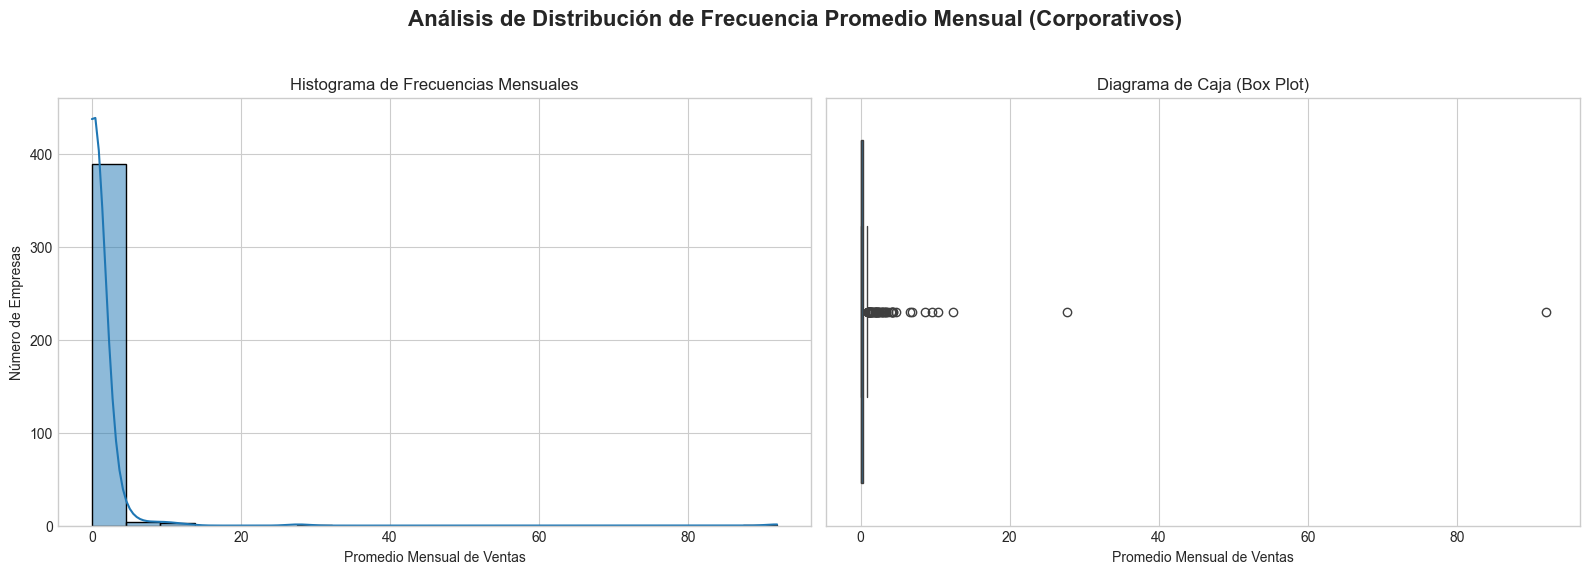


Prueba de Normalidad (Shapiro-Wilk):
Estadístico: 0.1221, P-valor: 3.448e-39
Conclusión: La muestra NO sigue una distribución normal.

--- 4. Generando Gráfico del Top 15 y Exportando a Excel ---


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2522/2546116354.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_15_mensual, x='frecuencia_promedio_mensual', y=col_cliente, palette='viridis')


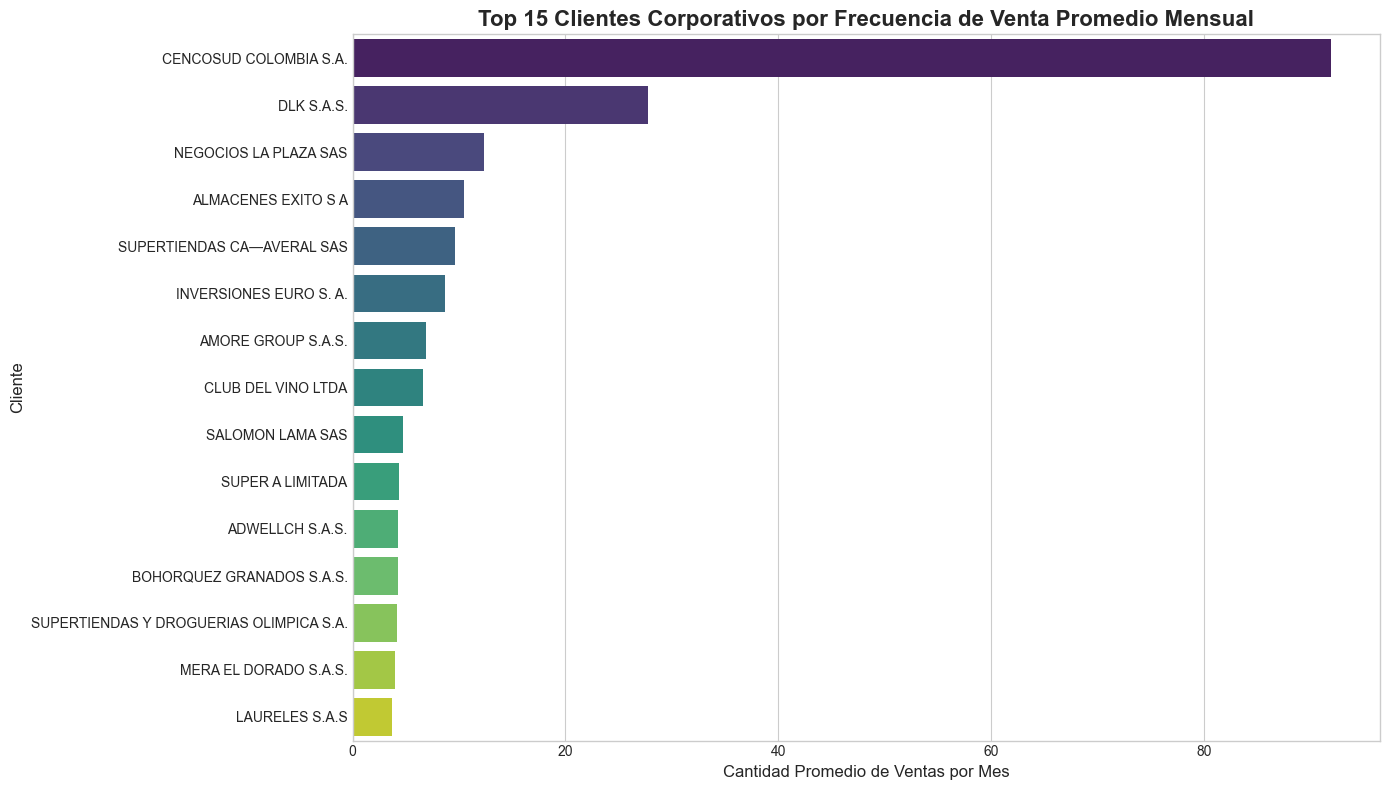


✔️ Reporte completo con todas las métricas guardado en 'reporte_frecuencias_clientes_corporativos_ventas.xlsx'

--- Proceso completado ---


In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path
import re

# --- PASO 1: CONFIGURACIÓN Y PREPARACIÓN ---
print("--- Iniciando Análisis Completo: Estadísticas y Gráfico Mensual Corporativo ---")

TOP_N = 15
CORPORATE_KEYWORDS = [
    'SAS', 'S.A.S', 'LTDA', 'LIMITADA', 'SA', 'S.A', 'CIA', 'COMPAÑIA', 
    'E.U', 'EMPRESAS', 'INDUSTRIA', 'SOCIEDAD', 'INVERSIONES', 'COMERCIALIZADORA',
    'GLOBAL', 'GROUP', 'GRUPO', 'DISTRIBUIDORA', 'LICORES'
]
col_cliente = 'cliente'
col_cod_cliente = 'cod_cliente'
col_documento = 'documento'

def extraer_anio_del_nombre(nombre_archivo: str) -> int:
    """Busca y extrae un año de 4 dígitos (que empieza con '20') del nombre de un archivo."""
    match = re.search(r'20\d{2}', str(nombre_archivo))
    if match: return int(match.group(0))
    return None

# --- PASO 2: CARGA, FILTRADO Y CÁLCULO DE MÉTRICAS ---
try:
    # Carga de datos
    ruta_base = Path("../data/raw")
    archivos_ventas = sorted([f for f in ruta_base.glob("ventas_dcto_202*.xlsx") if '_items' not in f.name])
    if not archivos_ventas: raise FileNotFoundError("No se encontraron archivos de ventas.")
        
    df_ventas = pd.concat(
        [pd.read_excel(f, engine="openpyxl").assign(anio=extraer_anio_del_nombre(f.name)) for f in archivos_ventas],
        ignore_index=True
    )
    df_ventas.dropna(subset=['anio'], inplace=True)
    df_ventas['anio'] = df_ventas['anio'].astype(int)
    print(f"✔️ Se cargaron {len(df_ventas)} registros de ventas con año válido.")

    # Filtro Corporativo
    patron_filtrado = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
    df_ventas_corp = df_ventas[df_ventas[col_cliente].str.contains(patron_filtrado, case=False, na=False)].copy()
    print(f"✔️ Se filtraron {len(df_ventas_corp)} registros de clientes corporativos.")

    # Cálculo de Métricas
    analisis_clientes_corp = (
        df_ventas_corp.groupby([col_cod_cliente, col_cliente])
        .agg(frecuencia_total=(col_documento, 'nunique'))
        .reset_index()
    )
    
    numero_de_anios = df_ventas_corp['anio'].nunique()
    if numero_de_anios > 0:
        total_meses = numero_de_anios * 12
        analisis_clientes_corp['frecuencia_promedio_anual'] = (analisis_clientes_corp['frecuencia_total'] / numero_de_anios).round(2)
        analisis_clientes_corp['frecuencia_promedio_mensual'] = (analisis_clientes_corp['frecuencia_total'] / total_meses).round(2)
        print("✔️ Métricas de frecuencia calculadas.")
    else:
        analisis_clientes_corp['frecuencia_promedio_anual'] = 0
        analisis_clientes_corp['frecuencia_promedio_mensual'] = 0

except (FileNotFoundError, KeyError) as e:
    print(f"ERROR: {e}")
    exit()

# --- PASO 3: ANÁLISIS ESTADÍSTICO PROFUNDO (SOBRE PROMEDIO MENSUAL) ---
print("\n--- 3. Análisis Estadístico de la Frecuencia Promedio Mensual ---")

frecuencia_mensual_corp = analisis_clientes_corp['frecuencia_promedio_mensual']

# 3.1 Estadísticas Descriptivas
print("\nEstadísticas Fundamentales (Promedio Mensual Corporativo):")
print(frecuencia_mensual_corp.describe().apply(lambda x: f'{x:,.2f}'))
print("\nOtras Medidas de Forma:")
print(f"Asimetría (Skewness): {frecuencia_mensual_corp.skew():.2f}")
print(f"Curtosis (Kurtosis): {frecuencia_mensual_corp.kurt():.2f}")

# 3.2 Visualización de la Distribución
print("\nGenerando visualización de la distribución...")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Análisis de Distribución de Frecuencia Promedio Mensual (Corporativos)', fontsize=16, weight='bold')
sns.histplot(frecuencia_mensual_corp, kde=True, ax=axes[0], bins=20)
axes[0].set_title('Histograma de Frecuencias Mensuales')
axes[0].set_xlabel('Promedio Mensual de Ventas'); axes[0].set_ylabel('Número de Empresas')
sns.boxplot(x=frecuencia_mensual_corp, ax=axes[1])
axes[1].set_title('Diagrama de Caja (Box Plot)'); axes[1].set_xlabel('Promedio Mensual de Ventas')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]); plt.show()

# 3.3 Prueba de Normalidad
print("\nPrueba de Normalidad (Shapiro-Wilk):")
stat, p_valor = stats.shapiro(frecuencia_mensual_corp[frecuencia_mensual_corp > 0])
print(f"Estadístico: {stat:.4f}, P-valor: {p_valor:.4g}")
if p_valor > 0.05: print("Conclusión: La muestra podría ser normal.")
else: print("Conclusión: La muestra NO sigue una distribución normal.")

# --- PASO 4: VISUALIZACIÓN DEL TOP 15 Y EXPORTACIÓN ---
print(f"\n--- 4. Generando Gráfico del Top {TOP_N} y Exportando a Excel ---")

reporte_final_corp = analisis_clientes_corp.sort_values(by='frecuencia_total', ascending=False)
top_15_mensual = reporte_final_corp.head(TOP_N)

# Gráfico de Barras del Top 15
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=top_15_mensual, x='frecuencia_promedio_mensual', y=col_cliente, palette='viridis')
plt.title(f'Top {TOP_N} Clientes Corporativos por Frecuencia de Venta Promedio Mensual', fontsize=16, weight='bold')
plt.xlabel('Cantidad Promedio de Ventas por Mes', fontsize=12)
plt.ylabel('Cliente', fontsize=12)
plt.tight_layout()
plt.show()

# Exportación final a Excel
nombre_archivo_salida = "reporte_frecuencias_clientes_corporativos_ventas.xlsx"
reporte_final_corp.to_excel(nombre_archivo_salida, index=False)
print(f"\n✔️ Reporte completo con todas las métricas guardado en '{nombre_archivo_salida}'")

print("\n--- Proceso completado ---")

In [51]:
import pandas as pd
from pathlib import Path
import re

# --- PASO 1: CONFIGURACIÓN Y PARÁMETROS ---
print("--- Iniciando la creación de la Lista Maestra de Clientes CORPORATIVOS desde Ventas ---")

# La lista de palabras clave para el filtro
CORPORATE_KEYWORDS = [
    'SAS', 'S.A.S', 'LTDA', 'LIMITADA', 'SA', 'S.A', 'CIA', 'COMPAÑIA', 
    'E.U', 'EMPRESAS', 'INDUSTRIA', 'SOCIEDAD', 'INVERSIONES', 'COMERCIALIZADORA',
    'GLOBAL', 'GROUP', 'GRUPO', 'DISTRIBUIDORA', 'LICORES'
]
col_cliente = 'cliente'
col_cod_cliente = 'cod_cliente'

# --- PASO 2: CARGA DE TODOS LOS DATOS DE VENTAS ---
try:
    ruta_base = Path("../data/raw")
    archivos_ventas = sorted([f for f in ruta_base.glob("ventas_dcto_202*.xlsx") if '_items' not in f.name])
    if not archivos_ventas:
        raise FileNotFoundError("No se encontraron archivos de ventas.")
    
    print(f"✔️ Se encontraron {len(archivos_ventas)} archivos de ventas para procesar.")
    
    df_todas_las_ventas = pd.concat(
        [pd.read_excel(f, engine="openpyxl") for f in archivos_ventas],
        ignore_index=True
    )
    print(f"✔️ Se cargaron un total de {len(df_todas_las_ventas)} registros de ventas.")

except (FileNotFoundError, KeyError) as e:
    print(f"ERROR al cargar los datos: {e}")
    exit()

# --- PASO 3: APLICACIÓN DEL FILTRO CORPORATIVO ---
print("\n--- Filtrando para quedarnos solo con Clientes Corporativos... ---")
patron_filtrado = r'\b(' + '|'.join(CORPORATE_KEYWORDS) + r')\b'
# Creamos un nuevo DataFrame que solo contiene las filas de empresas
df_ventas_corp = df_todas_las_ventas[
    df_todas_las_ventas[col_cliente].str.contains(patron_filtrado, case=False, na=False)
].copy()
print(f"✔️ Se encontraron {len(df_ventas_corp)} registros de ventas de clientes corporativos.")

# --- PASO 4: EXTRACCIÓN Y LIMPIEZA DE LA LISTA ÚNICA ---
print("\n--- Extrayendo la lista única de clientes corporativos... ---")
# Ahora trabajamos sobre el DataFrame ya filtrado 'df_ventas_corp'
lista_clientes_corp = df_ventas_corp[[col_cod_cliente, col_cliente]]

# Eliminamos los duplicados para tener la lista maestra final
lista_maestra_corp = lista_clientes_corp.drop_duplicates(subset=[col_cod_cliente]).copy()

# Ordenamos alfabéticamente
lista_maestra_corp.sort_values(by=col_cliente, inplace=True)

print(f"✔️ Se identificaron {len(lista_maestra_corp)} clientes corporativos únicos.")

# --- PASO 5: MOSTRAR Y EXPORTAR LA NUEVA LISTA MAESTRA CORPORATIVA ---
print("\n--- Lista Maestra de Clientes Corporativos (basada en Ventas) ---")
with pd.option_context('display.max_rows', 20): # Mostramos las 20 primeras
    print(lista_maestra_corp)

# Exportamos el reporte a Excel con un nombre más específico
nombre_archivo_salida = "lista_maestra_clientes_CORPORATIVOS_ventas.xlsx"
lista_maestra_corp.to_excel(nombre_archivo_salida, index=False)
print(f"\n✔️ Lista Maestra de Clientes Corporativos guardada en el archivo: '{nombre_archivo_salida}'")

print("\n--- Proceso completado ---")

--- Iniciando la creación de la Lista Maestra de Clientes CORPORATIVOS desde Ventas ---
✔️ Se encontraron 12 archivos de ventas para procesar.
✔️ Se cargaron un total de 204319 registros de ventas.

--- Filtrando para quedarnos solo con Clientes Corporativos... ---


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2522/1608298265.py:41: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_todas_las_ventas[col_cliente].str.contains(patron_filtrado, case=False, na=False)


✔️ Se encontraron 24321 registros de ventas de clientes corporativos.

--- Extrayendo la lista única de clientes corporativos... ---
✔️ Se identificaron 398 clientes corporativos únicos.

--- Lista Maestra de Clientes Corporativos (basada en Ventas) ---
             cod_cliente                              cliente
1278    CL  100000001616                             2621 SAS
62871   CL  400000001241                            96 ST SAS
1               CL 10463  A Y M INTERNACIONAL DE COMERCIO SAS
1071    CL  100000000090                     ABEL Y SOFIA SAS
61      CL  100000000487                 ABOS ORGANICOS S A S
...                  ...                                  ...
840     CL  100000001578                            YUSSO SAS
2515    CL  100000001672        ZHONG MEDINA MARI—O Y CIA SCS
130420  CL  100000001865                              ZOG SAS
174519  CL 5200000000376                    ZONAMEDICA MR SAS
95824   CL  100000001812             ZX VENTURES COLOMBIA SAS

[